<a href="https://colab.research.google.com/github/vargheseangeli/Spring2025FVLabUGResearch/blob/main/boneimmunedata_fillwithmean.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Bone Immune Data Analysis
Angeli Varghese

NaN values were replaced with group means for each feature

In [1]:
pip install ISLP

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 18.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.2/80.2 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 825.4/825.4 kB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 39.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 29.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 27.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.9 MB/s eta 0:00:00
   ━

In [2]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
import matplotlib.pyplot as plt
from statsmodels.datasets import get_rdataset
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from ISLP import load_data

In [3]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence \
     import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm
from ISLP.models import (ModelSpec as MS,
                         summarize,
                         poly)

In [4]:
from ISLP import confusion_table
from ISLP.models import contrast
from sklearn.discriminant_analysis import \
     (LinearDiscriminantAnalysis as LDA,
      QuadraticDiscriminantAnalysis as QDA)
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [5]:
from sklearn.cluster import \
     (KMeans,
      AgglomerativeClustering)
from scipy.cluster.hierarchy import \
     (dendrogram,
      cut_tree)
from ISLP.cluster import compute_linkage
import seaborn as sns

In [6]:
week8=pd.read_csv('week8.csv')
week8

CODE GROUP TREATMENT  ID  WEEK       CTX1       P1NP  Osteocalcin  \
0   SHAM.CON.8wk  SHAM       CON  27     8   8.678396  33.352875    43.001483   
1   SHAM.CON.8wk  SHAM       CON  28     8  10.621891  24.924023    25.214914   
2   SHAM.CON.8wk  SHAM       CON  29     8   8.724400  18.915117    17.316432   
3   SHAM.CON.8wk  SHAM       CON  30     8        NaN        NaN          NaN   
4   SHAM.CON.8wk  SHAM       CON  31     8  10.588232  22.263223    60.376019   
5   SHAM.CON.8wk  SHAM       CON  32     8   6.193446  21.564442    31.918405   
6   SHAM.CON.8wk  SHAM       CON  33     8        NaN        NaN          NaN   
7   SHAM.CON.8wk  SHAM       CON  34     8   9.363910  33.984705          NaN   
8   SHAM.CON.8wk  SHAM       CON  35     8   8.359306  19.519946    19.608305   
9   SHAM.CON.8wk  SHAM       CON  36     8  11.306601  21.584637    25.214914   
10  SHAM.CON.8wk  SHAM       CON  37     8        NaN        NaN          NaN   
11  SHAM.CON.8wk  SHAM       CON  38     8        NaN        NaN          NaN   
12   OVX.CON.8wk   OVX       CON  39     8  11.306601  24.451635    31.284779   
13   OVX.CON.8wk   OVX       CON  40     8  13.405773  29.223103          NaN   
14   OVX.CON.8wk   OVX       CON  41     8  12.671102  30.053372    72.189993   
15   OVX.CON.8wk   OVX       CON  42     8        NaN        NaN          NaN   
16   OVX.CON.8wk   OVX       CON  43     8  20.403581  30.727307    76.750690   
17   OVX.CON.8wk   OVX       CON  44     8  11.463753  22.879739    10.770843   
18   OVX.CON.8wk   OVX       CON  45     8  12.321855  19.126278    54.242681   
19   OVX.CON.8wk   OVX       CON  46     8        NaN        NaN          NaN   
20   OVX.CON.8wk   OVX       CON  47     8        NaN        NaN          NaN   
21   OVX.CON.8wk   OVX       CON  48     8        NaN        NaN          NaN   
22   OVX.CON.8wk   OVX       CON  49     8  17.571660  19.483802    68.110899   
23   OVX.CON.8wk   OVX       CON  50     8  14.910253  24.900145    24.827034   
24  SHAM.GOS.8wk  SHAM       GOS  51     8        NaN        NaN          NaN   
25  SHAM.GOS.8wk  SHAM       GOS  52     8   9.002665  19.738325    47.695974   
26  SHAM.GOS.8wk  SHAM       GOS  53     8  10.073351  21.972422    29.413434   
27  SHAM.GOS.8wk  SHAM       GOS  54     8   8.344238  19.126278    10.770843   
28  SHAM.GOS.8wk  SHAM       GOS  55     8        NaN        NaN          NaN   
29  SHAM.GOS.8wk  SHAM       GOS  56     8   7.780039  15.668973     6.226505   
30  SHAM.GOS.8wk  SHAM       GOS  57     8        NaN        NaN          NaN   
31  SHAM.GOS.8wk  SHAM       GOS  58     8  11.996064  17.231206    33.849317   
32  SHAM.GOS.8wk  SHAM       GOS  59     8   8.060115  16.931919          NaN   
33  SHAM.GOS.8wk  SHAM       GOS  60     8  10.024194  18.111352    38.305989   
34  SHAM.GOS.8wk  SHAM       GOS  61     8  15.364816  21.828643    25.604849   
35  SHAM.GOS.8wk  SHAM       GOS  62     8        NaN        NaN          NaN   
36  SHAM.GOS.8wk  SHAM       GOS  63     8        NaN        NaN          NaN   
37   OVX.GOS.8wk   OVX       GOS  64     8   8.045274  18.483049    24.249051   
38   OVX.GOS.8wk   OVX       GOS  65     8   8.254073  20.870799    46.437761   
39   OVX.GOS.8wk   OVX       GOS  66     8   7.634227  19.610620    46.188099   
40   OVX.GOS.8wk   OVX       GOS  67     8        NaN        NaN          NaN   
41   OVX.GOS.8wk   OVX       GOS  68     8        NaN        NaN          NaN   
42   OVX.GOS.8wk   OVX       GOS  69     8   9.747833  11.944576    32.770993   
43   OVX.GOS.8wk   OVX       GOS  70     8        NaN        NaN          NaN   
44   OVX.GOS.8wk   OVX       GOS  71     8   9.065028  12.047518    24.633863   
45   OVX.GOS.8wk   OVX       GOS  72     8  11.657408  18.862713    31.706645   
46   OVX.GOS.8wk   OVX       GOS  73     8        NaN        NaN          NaN   
47   OVX.GOS.8wk   OVX       GOS  74     8   8.632497  14.110485    55.331110   
48   OVX.GOS.8wk   OVX       GOS  75     8 

In [7]:
week8.columns

Index(['CODE', 'GROUP', 'TREATMENT', 'ID', 'WEEK', 'CTX1', 'P1NP',
       'Osteocalcin', 'f_BVTV', 'f_TbTh', 'f_TbSp', 'f_TbN', 'f_Tt.Ar',
       'f_Ct.Ar', 'f_Ct.Th', 'f_Ct.Ar/Tt.Ar', 'f_Ma.A', 'v_BVTV', 'v_TbTh',
       'v_TbSp', 'v_TbN', 'facs_CD3, %', 'facs_CD4/CD3, %', 'facs_CD8/CD3, %',
       'facs_CD25CD4/CD3, %', 'facs_Treg, %', 'facs_Th17, %',
       'facs_CD3, cells', 'facs_CD4/CD3, cells', 'facs_CD8/CD3, cells',
       'facs_CD25CD4/CD3, cells', 'facs_Treg, cells', 'facs_Th17, cells',
       'Uterine Weight', 'Cecal Content', 'sBMD_rel_change', 'sBMC_rel_change',
       'sBMA_rel_change', 'fBMD_rel_change', 'fBMC_rel_change',
       'fBMA_rel_change', 'BMD_rel_change', 'BMC_rel_change', 'BA_rel_change',
       'Lean_rel_change', 'Fat_rel_change', 'Fatp_rel_change', 'Wt_rel_change',
       'weekly_body_weight_rel_change'],
      dtype='object')

In [8]:
id_change=pd.DataFrame(week8,columns=['ID'])
for i in range(0,50):
 id_change.iloc[i]=id_change.iloc[i]-26

week8_new=pd.DataFrame(week8)
week8_new['ID']=id_change
week8_new

CODE GROUP TREATMENT  ID  WEEK       CTX1       P1NP  Osteocalcin  \
0   SHAM.CON.8wk  SHAM       CON   1     8   8.678396  33.352875    43.001483   
1   SHAM.CON.8wk  SHAM       CON   2     8  10.621891  24.924023    25.214914   
2   SHAM.CON.8wk  SHAM       CON   3     8   8.724400  18.915117    17.316432   
3   SHAM.CON.8wk  SHAM       CON   4     8        NaN        NaN          NaN   
4   SHAM.CON.8wk  SHAM       CON   5     8  10.588232  22.263223    60.376019   
5   SHAM.CON.8wk  SHAM       CON   6     8   6.193446  21.564442    31.918405   
6   SHAM.CON.8wk  SHAM       CON   7     8        NaN        NaN          NaN   
7   SHAM.CON.8wk  SHAM       CON   8     8   9.363910  33.984705          NaN   
8   SHAM.CON.8wk  SHAM       CON   9     8   8.359306  19.519946    19.608305   
9   SHAM.CON.8wk  SHAM       CON  10     8  11.306601  21.584637    25.214914   
10  SHAM.CON.8wk  SHAM       CON  11     8        NaN        NaN          NaN   
11  SHAM.CON.8wk  SHAM       CON  12     8        NaN        NaN          NaN   
12   OVX.CON.8wk   OVX       CON  13     8  11.306601  24.451635    31.284779   
13   OVX.CON.8wk   OVX       CON  14     8  13.405773  29.223103          NaN   
14   OVX.CON.8wk   OVX       CON  15     8  12.671102  30.053372    72.189993   
15   OVX.CON.8wk   OVX       CON  16     8        NaN        NaN          NaN   
16   OVX.CON.8wk   OVX       CON  17     8  20.403581  30.727307    76.750690   
17   OVX.CON.8wk   OVX       CON  18     8  11.463753  22.879739    10.770843   
18   OVX.CON.8wk   OVX       CON  19     8  12.321855  19.126278    54.242681   
19   OVX.CON.8wk   OVX       CON  20     8        NaN        NaN          NaN   
20   OVX.CON.8wk   OVX       CON  21     8        NaN        NaN          NaN   
21   OVX.CON.8wk   OVX       CON  22     8        NaN        NaN          NaN   
22   OVX.CON.8wk   OVX       CON  23     8  17.571660  19.483802    68.110899   
23   OVX.CON.8wk   OVX       CON  24     8  14.910253  24.900145    24.827034   
24  SHAM.GOS.8wk  SHAM       GOS  25     8        NaN        NaN          NaN   
25  SHAM.GOS.8wk  SHAM       GOS  26     8   9.002665  19.738325    47.695974   
26  SHAM.GOS.8wk  SHAM       GOS  27     8  10.073351  21.972422    29.413434   
27  SHAM.GOS.8wk  SHAM       GOS  28     8   8.344238  19.126278    10.770843   
28  SHAM.GOS.8wk  SHAM       GOS  29     8        NaN        NaN          NaN   
29  SHAM.GOS.8wk  SHAM       GOS  30     8   7.780039  15.668973     6.226505   
30  SHAM.GOS.8wk  SHAM       GOS  31     8        NaN        NaN          NaN   
31  SHAM.GOS.8wk  SHAM       GOS  32     8  11.996064  17.231206    33.849317   
32  SHAM.GOS.8wk  SHAM       GOS  33     8   8.060115  16.931919          NaN   
33  SHAM.GOS.8wk  SHAM       GOS  34     8  10.024194  18.111352    38.305989   
34  SHAM.GOS.8wk  SHAM       GOS  35     8  15.364816  21.828643    25.604849   
35  SHAM.GOS.8wk  SHAM       GOS  36     8        NaN        NaN          NaN   
36  SHAM.GOS.8wk  SHAM       GOS  37     8        NaN        NaN          NaN   
37   OVX.GOS.8wk   OVX       GOS  38     8   8.045274  18.483049    24.249051   
38   OVX.GOS.8wk   OVX       GOS  39     8   8.254073  20.870799    46.437761   
39   OVX.GOS.8wk   OVX       GOS  40     8   7.634227  19.610620    46.188099   
40   OVX.GOS.8wk   OVX       GOS  41     8        NaN        NaN          NaN   
41   OVX.GOS.8wk   OVX       GOS  42     8        NaN        NaN          NaN   
42   OVX.GOS.8wk   OVX       GOS  43     8   9.747833  11.944576    32.770993   
43   OVX.GOS.8wk   OVX       GOS  44     8        NaN        NaN          NaN   
44   OVX.GOS.8wk   OVX       GOS  45     8   9.065028  12.047518    24.633863   
45   OVX.GOS.8wk   OVX       GOS  46     8  11.657408  18.862713    31.706645   
46   OVX.GOS.8wk   OVX       GOS  47     8        NaN        NaN          NaN   
47   OVX.GOS.8wk   OVX       GOS  48     8   8.632497  14.110485    55.331110   
48   OVX.GOS.8wk   OVX       GOS  49     8 

In [9]:
week8_new.describe()

ID  WEEK       CTX1       P1NP  Osteocalcin     f_BVTV  \
count  50.00000  50.0  32.000000  32.000000    29.000000  32.000000   
mean   25.50000   8.0  10.587189  21.111726    36.239873   9.879622   
std    14.57738   0.0   3.115928   5.685028    18.255169   3.465809   
min     1.00000   8.0   6.193446  11.944576     6.226505   5.391055   
25%    13.25000   8.0   8.355539  18.390125    24.827034   7.059599   
50%    25.50000   8.0   9.886014  19.674472    31.918405   9.469078   
75%    37.75000   8.0  11.742072  23.272713    46.437761  11.559417   
max    50.00000   8.0  20.403581  33.984705    76.750690  18.732723   

          f_TbTh     f_TbSp      f_TbN    f_Tt.Ar  ...  fBMC_rel_change  \
count  32.000000  32.000000  32.000000  32.000000  ...        49.000000   
mean    0.061307   0.279857   1.582506   1.861004  ...         0.153241   
std     0.006376   0.024025   0.407822   0.075236  ...         0.087132   
min     0.053889   0.220157   0.998697   1.673733  ...        -0.081081   
25%     0.056294   0.261001   1.258208   1.820940  ...         0.096774   
50%     0.060345   0.281034   1.543343   1.875041  ...         0.166667   
75%     0.064572   0.298365   1.792053   1.910081  ...         0.193548   
max     0.077128   0.317209   2.648435   2.007753  ...         0.366667   

       fBMA_rel_change  BMD_rel_change  BMC_rel_change  BA_rel_change  \
count        49.000000       49.000000       49.000000      49.000000   
mean          0.052468        0.073606        0.090750       0.015604   
std           0.067439        0.042505        0.068789       0.057685   
min          -0.157895       -0.020833       -0.040080      -0.097098   
25%           0.020408        0.047801        0.049505      -0.017689   
50%           0.043478        0.068392        0.077586       0.014616   
75%           0.111111        0.108456        0.126464       0.043970   
max           0.181818        0.165657        0.261614       0.173971   

       Lean_rel_change  Fat_rel_change  Fatp_rel_change  Wt_rel_change  \
count        49.000000       49.000000        49.000000      49.000000   
mean          0.120566        1.075768         0.656750       0.191387   
std           0.071369        0.864901         0.531549       0.107275   
min          -0.022857       -0.038462        -0.141844       0.022936   
25%           0.066667        0.350000         0.257812       0.103286   
50%           0.119318        0.857143         0.584270       0.184834   
75%           0.174699        1.625000         0.979592       0.269710   
max           0.285714        3.555556         2.091954       0.447761   

       weekly_body_weight_rel_change  
count                      50.000000  
mean                        0.266821  
std                         0.145331  
min                         0.017857  
25%                         0.148655  
50%                         0.233192  
75%                         0.404878  
max                         0.563636  

[8 rows x 46 columns]

In [10]:
corr_table=week8_new.corr(numeric_only=True)
corr_table

ID  WEEK      CTX1      P1NP  \
ID                             1.000000   NaN -0.145653 -0.691100   
WEEK                                NaN   NaN       NaN       NaN   
CTX1                          -0.145653   NaN  1.000000  0.391453   
P1NP                          -0.691100   NaN  0.391453  1.000000   
Osteocalcin                   -0.025772   NaN  0.457373  0.325442   
f_BVTV                         0.348552   NaN -0.056253 -0.241219   
f_TbTh                         0.361871   NaN -0.275013 -0.448656   
f_TbSp                        -0.284727   NaN -0.025670  0.147554   
f_TbN                          0.337544   NaN  0.026224 -0.163647   
f_Tt.Ar                        0.046456   NaN -0.127371 -0.181720   
f_Ct.Ar                        0.104375   NaN  0.067938 -0.241610   
f_Ct.Th                        0.066315   NaN  0.136742 -0.170323   
f_Ct.Ar/Tt.Ar                  0.065809   NaN  0.172927 -0.075243   
f_Ma.A                        -0.013070   NaN -0.184721 -0.052780   
v_BVTV                         0.342244   NaN -0.026955 -0.265685   
v_TbTh                         0.279643   NaN -0.201219 -0.366414   
v_TbSp                        -0.264077   NaN -0.157031  0.137999   
v_TbN                          0.327512   NaN  0.144423 -0.122207   
facs_CD3, %                   -0.072841   NaN -0.165576  0.134671   
facs_CD4/CD3, %                0.106433   NaN -0.062090 -0.517231   
facs_CD8/CD3, %               -0.245193   NaN -0.099057  0.025981   
facs_CD25CD4/CD3, %           -0.225105   NaN -0.289613  0.369108   
facs_Treg, %                  -0.272892   NaN -0.139170  0.428581   
facs_Th17, %                   0.030140   NaN -0.176673  0.090180   
facs_CD3, cells               -0.110213   NaN -0.300583  0.328448   
facs_CD4/CD3, cells           -0.031066   NaN -0.289541 -0.100167   
facs_CD8/CD3, cells           -0.317508   NaN -0.285679  0.328932   
facs_CD25CD4/CD3, cells       -0.205811   NaN -0.296998  0.443113   
facs_Treg, cells              -0.245537   NaN -0.206768  0.473298   
facs_Th17, cells              -0.032977   NaN -0.234521  0.195864   
Uterine Weight                -0.410372   NaN -0.326724  0.078882   
Cecal Content                  0.680996   NaN -0.203362 -0.542295   
sBMD_rel_change                0.261300   NaN -0.120418 -0.405013   
sBMC_rel_change                0.152599   NaN -0.208025 -0.352243   
sBMA_rel_change               -0.097104   NaN -0.154177 -0.185056   
fBMD_rel_change                0.266229   NaN -0.083323 -0.268778   
fBMC_rel_change               -0.001010   NaN  0.034609  0.043469   
fBMA_rel_change               -0.239569   NaN  0.089367  0.272795   
BMD_rel_change                 0.288351   NaN -0.121092 -0.438016   
BMC_rel_change                 0.114257   NaN -0.053050 -0.166252   
BA_rel_change                 -0.088118   NaN  0.037709  0.135133   
Lean_rel_change                0.586331   NaN  0.145611 -0.446387   
Fat_rel_change                 0.509472   NaN -0.009852 -0.135727   
Fatp_rel_change                0.449923   NaN  0.011121 -0.049400   
Wt_rel_change                  0.603363   NaN  0.094921 -0.289966   
weekly_body_weight_rel_change  0.619353   NaN  0.054286 -0.243600   

                               Osteocalcin    f_BVTV    f_TbTh    f_TbSp  \
ID                               -0.025772  0.348552  0.361871 -0.284727   
WEEK                                   NaN       NaN       NaN       NaN   
CTX1                              0.457373 -0.056253 -0.275013 -0.025670   
P1NP                              0.325442 -0.241219 -0.448656  0.147554   
Osteocalcin                       1.000000 -0.208338 -0.340786  0.161144   
f_BVTV                           -0.208338  1.000000  0.847037 -0.920038   
f_TbTh                           -0.340786  0.847037  1.000000 -0.652282   
f_TbSp                            0.161144 -0.920038 -0.652282  1.000000   
f_TbN                            -0.152372  0.971336  0.705647 -0.959904   
f_Tt.Ar                          

In [11]:
fBVTV_corr=corr_table['f_BVTV']
fBVTV_corr.sort_values(ascending=False)

f_BVTV                           1.000000
f_TbN                            0.971336
v_BVTV                           0.899257
v_TbTh                           0.852208
f_TbTh                           0.847037
f_Ct.Th                          0.769185
f_Ct.Ar/Tt.Ar                    0.764168
v_TbN                            0.729837
fBMD_rel_change                  0.609288
f_Ct.Ar                          0.540435
Cecal Content                    0.470544
fBMC_rel_change                  0.442125
facs_CD8/CD3, %                  0.436144
Uterine Weight                   0.419648
BMC_rel_change                   0.418290
BMD_rel_change                   0.373881
ID                               0.348552
sBMC_rel_change                  0.313319
sBMD_rel_change                  0.278360
facs_CD3, %                      0.196129
sBMA_rel_change                  0.177215
BA_rel_change                    0.171825
facs_CD4/CD3, %                  0.118199
Lean_rel_change                  0.000178
facs_CD8/CD3, cells             -0.027849
fBMA_rel_change                 -0.037736
facs_Th17, %                    -0.042599
CTX1                            -0.056253
facs_CD25CD4/CD3, %             -0.083727
facs_CD3, cells                 -0.126538
facs_Th17, cells                -0.191092
Osteocalcin                     -0.208338
f_Tt.Ar                         -0.233364
facs_CD4/CD3, cells             -0.235922
facs_Treg, %                    -0.236321
P1NP                            -0.241219
Wt_rel_change                   -0.255286
weekly_body_weight_rel_change   -0.293315
facs_CD25CD4/CD3, cells         -0.310184
facs_Treg, cells                -0.360387
Fat_rel_change                  -0.360789
Fatp_rel_change                 -0.391926
v_TbSp                          -0.534221
f_Ma.A                          -0.596404
f_TbSp                          -0.920038
WEEK                                  NaN
Name: f_BVTV, dtype: float64

In [12]:
vBVTV_corr=corr_table['v_BVTV']
vBVTV_corr.sort_values(ascending=False)

v_BVTV                           1.000000
v_TbTh                           0.901541
f_BVTV                           0.899257
v_TbN                            0.877251
f_TbN                            0.862116
f_Ct.Th                          0.811331
f_TbTh                           0.798874
f_Ct.Ar/Tt.Ar                    0.741037
fBMD_rel_change                  0.632595
f_Ct.Ar                          0.619834
Cecal Content                    0.540825
sBMD_rel_change                  0.490455
BMC_rel_change                   0.466897
sBMC_rel_change                  0.443716
fBMC_rel_change                  0.394552
facs_CD8/CD3, %                  0.393064
Uterine Weight                   0.392939
BMD_rel_change                   0.380035
ID                               0.342244
facs_CD3, %                      0.265603
BA_rel_change                    0.227624
sBMA_rel_change                  0.169807
facs_CD4/CD3, %                  0.093781
facs_CD8/CD3, cells              0.000077
Lean_rel_change                 -0.026732
CTX1                            -0.026955
facs_Th17, %                    -0.043810
facs_CD3, cells                 -0.051787
Osteocalcin                     -0.052573
facs_CD25CD4/CD3, %             -0.059848
fBMA_rel_change                 -0.097525
f_Tt.Ar                         -0.129631
facs_Th17, cells                -0.171177
facs_CD4/CD3, cells             -0.206868
facs_Treg, %                    -0.215638
Wt_rel_change                   -0.253050
facs_CD25CD4/CD3, cells         -0.262570
P1NP                            -0.265685
weekly_body_weight_rel_change   -0.316290
facs_Treg, cells                -0.319676
Fat_rel_change                  -0.363196
Fatp_rel_change                 -0.380109
f_Ma.A                          -0.530042
v_TbSp                          -0.674699
f_TbSp                          -0.807678
WEEK                                  NaN
Name: v_BVTV, dtype: float64

/usr/local/lib/python3.11/dist-packages/pandas/plotting/_matplotlib/misc.py:100: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(boundaries_list[j])
/usr/local/lib/python3.11/dist-packages/pandas/plotting/_matplotlib/misc.py:101: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(boundaries_list[i])
/usr/local/lib/python3.11/dist-packages/pandas/plotting/_matplotlib/misc.py:91: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(boundaries_list[i])


array([[<Axes: xlabel='ID', ylabel='ID'>,
        <Axes: xlabel='WEEK', ylabel='ID'>,
        <Axes: xlabel='CTX1', ylabel='ID'>, ...,
        <Axes: xlabel='Fatp_rel_change', ylabel='ID'>,
        <Axes: xlabel='Wt_rel_change', ylabel='ID'>,
        <Axes: xlabel='weekly_body_weight_rel_change', ylabel='ID'>],
       [<Axes: xlabel='ID', ylabel='WEEK'>,
        <Axes: xlabel='WEEK', ylabel='WEEK'>,
        <Axes: xlabel='CTX1', ylabel='WEEK'>, ...,
        <Axes: xlabel='Fatp_rel_change', ylabel='WEEK'>,
        <Axes: xlabel='Wt_rel_change', ylabel='WEEK'>,
        <Axes: xlabel='weekly_body_weight_rel_change', ylabel='WEEK'>],
       [<Axes: xlabel='ID', ylabel='CTX1'>,
        <Axes: xlabel='WEEK', ylabel='CTX1'>,
        <Axes: xlabel='CTX1', ylabel='CTX1'>, ...,
        <Axes: xlabel='Fatp_rel_change', ylabel='CTX1'>,
        <Axes: xlabel='Wt_rel_change', ylabel='CTX1'>,
        <Axes: xlabel='weekly_body_weight_rel_change', ylabel='CTX1'>],
       ...,
       [<Axes: xlabel='ID

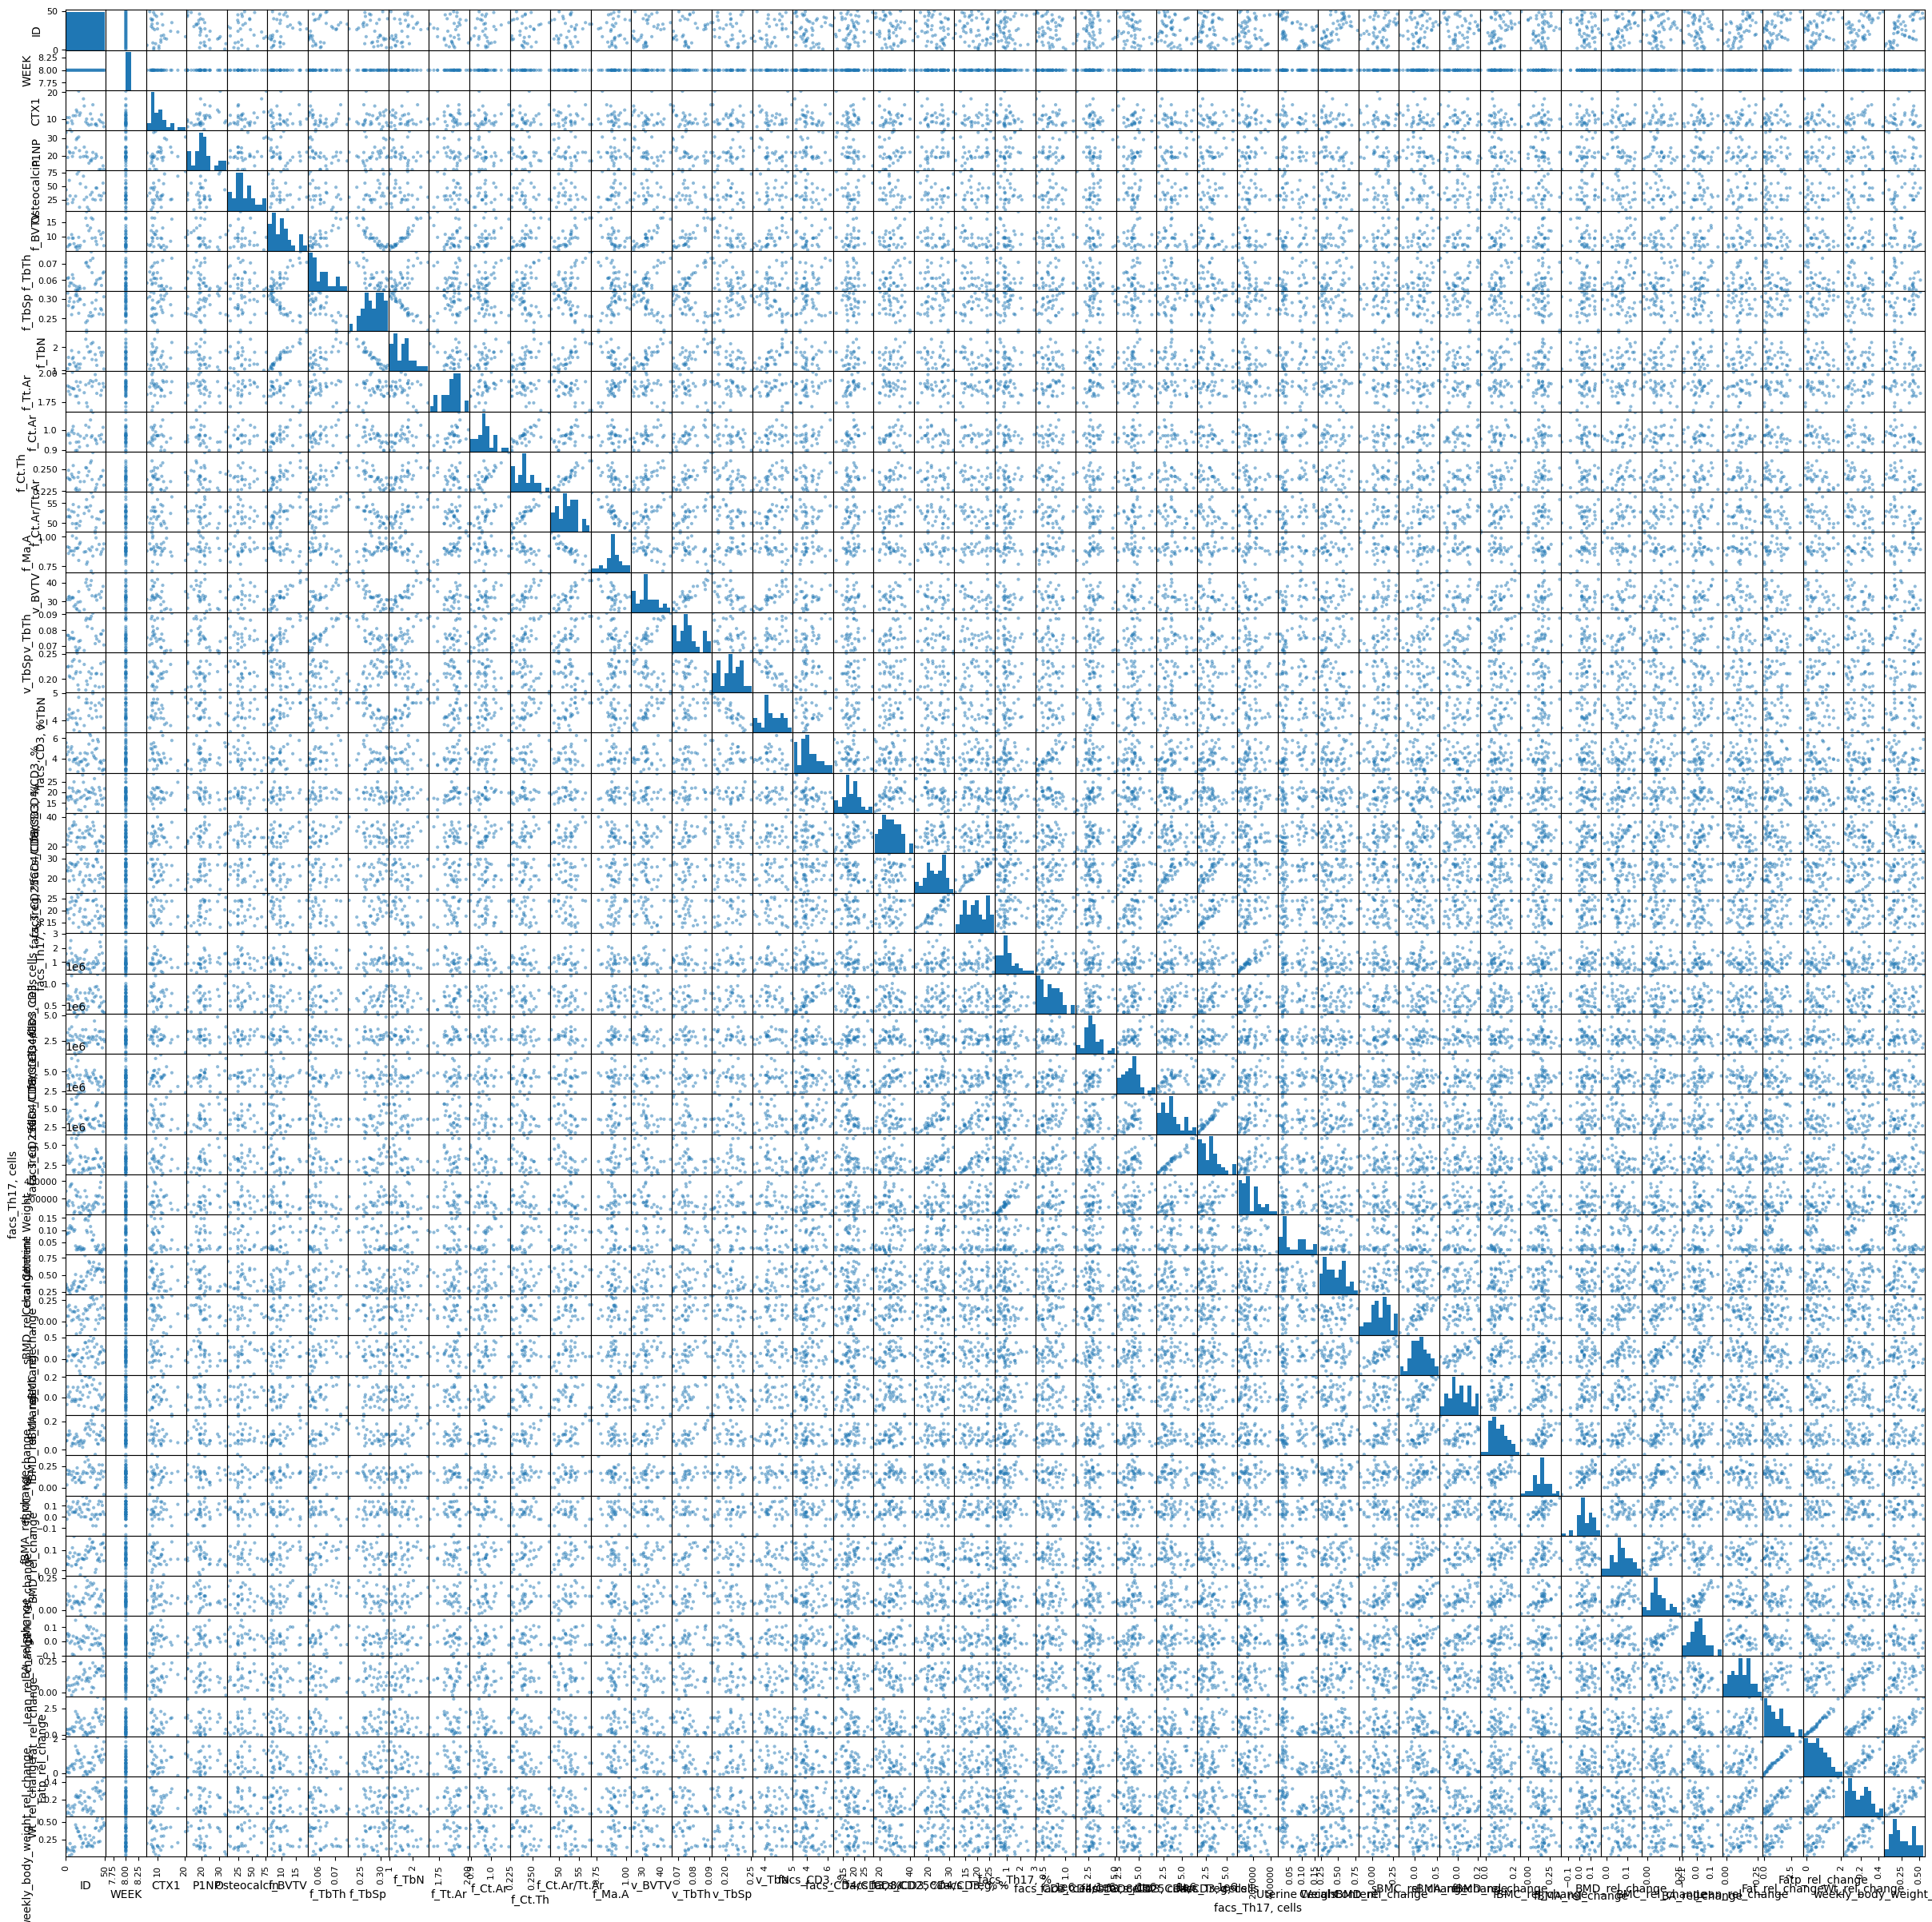

In [13]:
pd.plotting.scatter_matrix(week8_new,figsize=(30,30))

# Adding dummy variables for ovx, sham, con and gos
Dropped ID, WEEK, uterine weight and cecal weight columns

In [14]:
week8_num=pd.get_dummies(week8_new)

cols=[0,1,30,31]
week8_num=week8_num.drop(week8_num.columns[cols],axis=1)

week8_num['Groups']='SHAM_CON'
week8_num.loc[week8_num['CODE_OVX.CON.8wk']==True,'Groups']='OVX_CON'
week8_num.loc[week8_num['CODE_OVX.GOS.8wk']==True,'Groups']='OVX_GOS'
week8_num.loc[week8_num['CODE_SHAM.GOS.8wk']==True,'Groups']='SHAM_GOS'
week8_num

CTX1       P1NP  Osteocalcin     f_BVTV    f_TbTh    f_TbSp  \
0    8.678396  33.352875    43.001483        NaN       NaN       NaN   
1   10.621891  24.924023    25.214914        NaN       NaN       NaN   
2    8.724400  18.915117    17.316432   6.533580  0.060940  0.314338   
3         NaN        NaN          NaN   9.561600  0.061400  0.282400   
4   10.588232  22.263223    60.376019   7.097617  0.056343  0.293051   
5    6.193446  21.564442    31.918405   7.297900  0.058200  0.301600   
6         NaN        NaN          NaN        NaN       NaN       NaN   
7    9.363910  33.984705          NaN  10.729665  0.058021  0.259600   
8    8.359306  19.519946    19.608305   9.479761  0.063193  0.277121   
9   11.306601  21.584637    25.214914   9.502290  0.061055  0.279668   
10        NaN        NaN          NaN   7.546084  0.056821  0.291818   
11        NaN        NaN          NaN        NaN       NaN       NaN   
12  11.306601  24.451635    31.284779   6.416905  0.053910  0.308359   
13  13.405773  29.223103          NaN   6.396768  0.056016  0.313107   
14  12.671102  30.053372    72.189993   5.391055  0.053981  0.307243   
15        NaN        NaN          NaN   6.841239  0.053889  0.293742   
16  20.403581  30.727307    76.750690   9.772944  0.055007  0.263181   
17  11.463753  22.879739    10.770843   6.176383  0.056145  0.299415   
18  12.321855  19.126278    54.242681   6.945548  0.054754  0.298015   
19        NaN        NaN          NaN        NaN       NaN       NaN   
20        NaN        NaN          NaN        NaN       NaN       NaN   
21        NaN        NaN          NaN        NaN       NaN       NaN   
22  17.571660  19.483802    68.110899        NaN       NaN       NaN   
23  14.910253  24.900145    24.827034   8.411803  0.054967  0.284869   
24        NaN        NaN          NaN        NaN       NaN       NaN   
25   9.002665  19.738325    47.695974  16.464109  0.070362  0.239621   
26  10.073351  21.972422    29.413434  18.732723  0.070731  0.220157   
27   8.344238  19.126278    10.770843  13.887900  0.068616  0.243989   
28        NaN        NaN          NaN        NaN       NaN       NaN   
29   7.780039  15.668973     6.226505  12.096842  0.067774  0.256677   
30        NaN        NaN          NaN        NaN       NaN       NaN   
31  11.996064  17.231206    33.849317  13.036060  0.071880  0.264899   
32   8.060115  16.931919          NaN  16.546230  0.077128  0.255090   
33  10.024194  18.111352    38.305989   9.458395  0.064471  0.289839   
34  15.364816  21.828643    25.604849  16.111516  0.073198  0.257288   
35        NaN        NaN          NaN        NaN       NaN       NaN   
36        NaN        NaN          NaN        NaN       NaN       NaN   
37   8.045274  18.483049    24.249051   9.643020  0.057305  0.273860   
38   8.254073  20.870799    46.437761   8.389128  0.058152  0.296282   
39   7.634227  19.610620    46.188099   7.281459  0.059950  0.317209   
40        NaN        NaN          NaN        NaN       NaN       NaN   
41        NaN        NaN          NaN        NaN       NaN       NaN   
42   9.747833  11.944576    32.770993  11.969587  0.060739  0.261311   
43        NaN        NaN          NaN        NaN       NaN       NaN   
44   9.065028  12.047518    24.633863  10.822638  0.061056  0.275020   
45  11.657408  18.862713    31.706645   9.319933  0.056694  0.271575   
46        NaN        NaN          NaN        NaN       NaN       NaN   
47   8.632497  14.110485    55.331110  11.422694  0.064239  0.260071   
48   7.217470  12.081991    36.944498   6.864526  0.064875  0.305008   
49        NaN        NaN          NaN        NaN       NaN       NaN   

       f_TbN   f_Tt.Ar   f_Ct.Ar   f_Ct.Th  ...  \
0        NaN       NaN       NaN       NaN  ...   
1        NaN       NaN       NaN       NaN  ...   
2   1.072141  1.888325  0.973667  0.240256  ...   
3   1.557200  1.841247  0.981967  0.248929  ...   
4   1.259711  1.879604  0.972052  0.238803  ...   
5   1.253700  1.813841  0.9337

In [15]:
cols=[42,43,44,45,46,47,48,49]
week8_num=week8_num.drop(week8_num.columns[cols],axis=1)
week8_num

CTX1       P1NP  Osteocalcin     f_BVTV    f_TbTh    f_TbSp  \
0    8.678396  33.352875    43.001483        NaN       NaN       NaN   
1   10.621891  24.924023    25.214914        NaN       NaN       NaN   
2    8.724400  18.915117    17.316432   6.533580  0.060940  0.314338   
3         NaN        NaN          NaN   9.561600  0.061400  0.282400   
4   10.588232  22.263223    60.376019   7.097617  0.056343  0.293051   
5    6.193446  21.564442    31.918405   7.297900  0.058200  0.301600   
6         NaN        NaN          NaN        NaN       NaN       NaN   
7    9.363910  33.984705          NaN  10.729665  0.058021  0.259600   
8    8.359306  19.519946    19.608305   9.479761  0.063193  0.277121   
9   11.306601  21.584637    25.214914   9.502290  0.061055  0.279668   
10        NaN        NaN          NaN   7.546084  0.056821  0.291818   
11        NaN        NaN          NaN        NaN       NaN       NaN   
12  11.306601  24.451635    31.284779   6.416905  0.053910  0.308359   
13  13.405773  29.223103          NaN   6.396768  0.056016  0.313107   
14  12.671102  30.053372    72.189993   5.391055  0.053981  0.307243   
15        NaN        NaN          NaN   6.841239  0.053889  0.293742   
16  20.403581  30.727307    76.750690   9.772944  0.055007  0.263181   
17  11.463753  22.879739    10.770843   6.176383  0.056145  0.299415   
18  12.321855  19.126278    54.242681   6.945548  0.054754  0.298015   
19        NaN        NaN          NaN        NaN       NaN       NaN   
20        NaN        NaN          NaN        NaN       NaN       NaN   
21        NaN        NaN          NaN        NaN       NaN       NaN   
22  17.571660  19.483802    68.110899        NaN       NaN       NaN   
23  14.910253  24.900145    24.827034   8.411803  0.054967  0.284869   
24        NaN        NaN          NaN        NaN       NaN       NaN   
25   9.002665  19.738325    47.695974  16.464109  0.070362  0.239621   
26  10.073351  21.972422    29.413434  18.732723  0.070731  0.220157   
27   8.344238  19.126278    10.770843  13.887900  0.068616  0.243989   
28        NaN        NaN          NaN        NaN       NaN       NaN   
29   7.780039  15.668973     6.226505  12.096842  0.067774  0.256677   
30        NaN        NaN          NaN        NaN       NaN       NaN   
31  11.996064  17.231206    33.849317  13.036060  0.071880  0.264899   
32   8.060115  16.931919          NaN  16.546230  0.077128  0.255090   
33  10.024194  18.111352    38.305989   9.458395  0.064471  0.289839   
34  15.364816  21.828643    25.604849  16.111516  0.073198  0.257288   
35        NaN        NaN          NaN        NaN       NaN       NaN   
36        NaN        NaN          NaN        NaN       NaN       NaN   
37   8.045274  18.483049    24.249051   9.643020  0.057305  0.273860   
38   8.254073  20.870799    46.437761   8.389128  0.058152  0.296282   
39   7.634227  19.610620    46.188099   7.281459  0.059950  0.317209   
40        NaN        NaN          NaN        NaN       NaN       NaN   
41        NaN        NaN          NaN        NaN       NaN       NaN   
42   9.747833  11.944576    32.770993  11.969587  0.060739  0.261311   
43        NaN        NaN          NaN        NaN       NaN       NaN   
44   9.065028  12.047518    24.633863  10.822638  0.061056  0.275020   
45  11.657408  18.862713    31.706645   9.319933  0.056694  0.271575   
46        NaN        NaN          NaN        NaN       NaN       NaN   
47   8.632497  14.110485    55.331110  11.422694  0.064239  0.260071   
48   7.217470  12.081991    36.944498   6.864526  0.064875  0.305008   
49        NaN        NaN          NaN        NaN       NaN       NaN   

       f_TbN   f_Tt.Ar   f_Ct.Ar   f_Ct.Th  ...  fBMA_rel_change  \
0        NaN       NaN       NaN       NaN  ...         0.139535   
1        NaN       NaN       NaN       NaN  ...        -0.020408   
2   1.072141  1.888325  0.973667  0.240256  ...         0.043478   
3   1.557200  1.841247  0.981967  0.248929  ...         0.090909

# Replacing Nan Values with group means

In [16]:
sc_means=pd.DataFrame(week8_num.loc[week8_num['Groups']=='SHAM_CON'].describe())
sc_means=sc_means.drop(index=['count','std','min','25%','50%','75%','max'])
sc_means

CTX1       P1NP  Osteocalcin    f_BVTV    f_TbTh    f_TbSp  \
mean  9.229523  24.513621     31.80721  8.468562  0.059497  0.287449   

         f_TbN   f_Tt.Ar   f_Ct.Ar   f_Ct.Th  ...  fBMC_rel_change  \
mean  1.422068  1.878465  0.981668  0.243372  ...         0.145112   

      fBMA_rel_change  BMD_rel_change  BMC_rel_change  BA_rel_change  \
mean         0.062172        0.068904        0.068754       0.001303   

      Lean_rel_change  Fat_rel_change  Fatp_rel_change  Wt_rel_change  \
mean         0.055302        0.425428         0.286622       0.089418   

      weekly_body_weight_rel_change  
mean                       0.103106  

[1 rows x 42 columns]

In [17]:
sc_means.columns

Index(['CTX1', 'P1NP', 'Osteocalcin', 'f_BVTV', 'f_TbTh', 'f_TbSp', 'f_TbN',
       'f_Tt.Ar', 'f_Ct.Ar', 'f_Ct.Th', 'f_Ct.Ar/Tt.Ar', 'f_Ma.A', 'v_BVTV',
       'v_TbTh', 'v_TbSp', 'v_TbN', 'facs_CD3, %', 'facs_CD4/CD3, %',
       'facs_CD8/CD3, %', 'facs_CD25CD4/CD3, %', 'facs_Treg, %',
       'facs_Th17, %', 'facs_CD3, cells', 'facs_CD4/CD3, cells',
       'facs_CD8/CD3, cells', 'facs_CD25CD4/CD3, cells', 'facs_Treg, cells',
       'facs_Th17, cells', 'sBMD_rel_change', 'sBMC_rel_change',
       'sBMA_rel_change', 'fBMD_rel_change', 'fBMC_rel_change',
       'fBMA_rel_change', 'BMD_rel_change', 'BMC_rel_change', 'BA_rel_change',
       'Lean_rel_change', 'Fat_rel_change', 'Fatp_rel_change', 'Wt_rel_change',
       'weekly_body_weight_rel_change'],
      dtype='object')

In [18]:
sc_means.iloc[0,0]

np.float64(9.229522762625)

In [19]:
oc_means=pd.DataFrame(week8_num.loc[week8_num['Groups']=='OVX_CON'].describe())
oc_means
oc_means=oc_means.drop(index=['count','std','min','25%','50%','75%','max'])
oc_means

CTX1       P1NP  Osteocalcin    f_BVTV    f_TbTh    f_TbSp  \
mean  14.256822  25.105673    48.310988  7.044081  0.054834  0.295991   

         f_TbN   f_Tt.Ar   f_Ct.Ar   f_Ct.Th  ...  fBMC_rel_change  \
mean  1.284506  1.843755  0.936398  0.233248  ...         0.121509   

      fBMA_rel_change  BMD_rel_change  BMC_rel_change  BA_rel_change  \
mean         0.071885        0.044223        0.057252       0.012052   

      Lean_rel_change  Fat_rel_change  Fatp_rel_change  Wt_rel_change  \
mean         0.121747         1.23484         0.797294       0.209729   

      weekly_body_weight_rel_change  
mean                       0.320009  

[1 rows x 42 columns]

In [20]:
sg_means=pd.DataFrame(week8_num.loc[week8_num['Groups']=='SHAM_GOS'].describe())
sg_means
sg_means=sg_means.drop(index=['count','std','min','25%','50%','75%','max'])
sg_means

CTX1      P1NP  Osteocalcin     f_BVTV   f_TbTh    f_TbSp  \
mean  10.080685  18.82614    27.409559  14.541722  0.07052  0.253445   

         f_TbN  f_Tt.Ar   f_Ct.Ar   f_Ct.Th  ...  fBMC_rel_change  \
mean  2.053033   1.8344  1.000623  0.252409  ...         0.226836   

      fBMA_rel_change  BMD_rel_change  BMC_rel_change  BA_rel_change  \
mean         0.049538        0.107857        0.166106       0.052564   

      Lean_rel_change  Fat_rel_change  Fatp_rel_change  Wt_rel_change  \
mean         0.110421        0.519925         0.291806        0.13952   

      weekly_body_weight_rel_change  
mean                       0.212638  

[1 rows x 42 columns]

In [21]:
og_means=pd.DataFrame(week8_num.loc[week8_num['Groups']=='OVX_GOS'].describe())
og_means
og_means=og_means.drop(index=['count','std','min','25%','50%','75%','max'])
og_means

CTX1       P1NP  Osteocalcin    f_BVTV    f_TbTh    f_TbSp  \
mean  8.781726  16.001469    37.282753  9.464123  0.060376  0.282542   

         f_TbN   f_Tt.Ar   f_Ct.Ar   f_Ct.Th  ...  fBMC_rel_change  \
mean  1.570419  1.887398  0.960863  0.236322  ...         0.115817   

      fBMA_rel_change  BMD_rel_change  BMC_rel_change  BA_rel_change  \
mean         0.029263        0.070454        0.064926      -0.005977   

      Lean_rel_change  Fat_rel_change  Fatp_rel_change  Wt_rel_change  \
mean         0.184844        2.035063         1.205146       0.312603   

      weekly_body_weight_rel_change  
mean                       0.423029  

[1 rows x 42 columns]

In [22]:
for j in range(0,42):
    week8_num.loc[week8_num['Groups']=='SHAM_CON',week8_num.columns[j]]=week8_num.fillna({sc_means.columns[j]: sc_means.iloc[0,j]})
    week8_num.loc[week8_num['Groups']=='OVX_CON',week8_num.columns[j]]=week8_num.fillna({oc_means.columns[j]: oc_means.iloc[0,j]})
    week8_num.loc[week8_num['Groups']=='SHAM_GOS',week8_num.columns[j]]=week8_num.fillna({sg_means.columns[j]: sg_means.iloc[0,j]})
    week8_num.loc[week8_num['Groups']=='OVX_GOS',week8_num.columns[j]]=week8_num.fillna({og_means.columns[j]: og_means.iloc[0,j]})

In [23]:
week8_num

CTX1       P1NP  Osteocalcin     f_BVTV    f_TbTh    f_TbSp  \
0    8.678396  33.352875    43.001483   8.468562  0.059497  0.287449   
1   10.621891  24.924023    25.214914   8.468562  0.059497  0.287449   
2    8.724400  18.915117    17.316432   6.533580  0.060940  0.314338   
3    9.229523  24.513621    31.807210   9.561600  0.061400  0.282400   
4   10.588232  22.263223    60.376019   7.097617  0.056343  0.293051   
5    6.193446  21.564442    31.918405   7.297900  0.058200  0.301600   
6    9.229523  24.513621    31.807210   8.468562  0.059497  0.287449   
7    9.363910  33.984705    31.807210  10.729665  0.058021  0.259600   
8    8.359306  19.519946    19.608305   9.479761  0.063193  0.277121   
9   11.306601  21.584637    25.214914   9.502290  0.061055  0.279668   
10   9.229523  24.513621    31.807210   7.546084  0.056821  0.291818   
11   9.229523  24.513621    31.807210   8.468562  0.059497  0.287449   
12  11.306601  24.451635    31.284779   6.416905  0.053910  0.308359   
13  13.405773  29.223103    48.310988   6.396768  0.056016  0.313107   
14  12.671102  30.053372    72.189993   5.391055  0.053981  0.307243   
15  14.256822  25.105673    48.310988   6.841239  0.053889  0.293742   
16  20.403581  30.727307    76.750690   9.772944  0.055007  0.263181   
17  11.463753  22.879739    10.770843   6.176383  0.056145  0.299415   
18  12.321855  19.126278    54.242681   6.945548  0.054754  0.298015   
19  14.256822  25.105673    48.310988   7.044081  0.054834  0.295991   
20  14.256822  25.105673    48.310988   7.044081  0.054834  0.295991   
21  14.256822  25.105673    48.310988   7.044081  0.054834  0.295991   
22  17.571660  19.483802    68.110899   7.044081  0.054834  0.295991   
23  14.910253  24.900145    24.827034   8.411803  0.054967  0.284869   
24  10.080685  18.826140    27.409559  14.541722  0.070520  0.253445   
25   9.002665  19.738325    47.695974  16.464109  0.070362  0.239621   
26  10.073351  21.972422    29.413434  18.732723  0.070731  0.220157   
27   8.344238  19.126278    10.770843  13.887900  0.068616  0.243989   
28  10.080685  18.826140    27.409559  14.541722  0.070520  0.253445   
29   7.780039  15.668973     6.226505  12.096842  0.067774  0.256677   
30  10.080685  18.826140    27.409559  14.541722  0.070520  0.253445   
31  11.996064  17.231206    33.849317  13.036060  0.071880  0.264899   
32   8.060115  16.931919    27.409559  16.546230  0.077128  0.255090   
33  10.024194  18.111352    38.305989   9.458395  0.064471  0.289839   
34  15.364816  21.828643    25.604849  16.111516  0.073198  0.257288   
35  10.080685  18.826140    27.409559  14.541722  0.070520  0.253445   
36  10.080685  18.826140    27.409559  14.541722  0.070520  0.253445   
37   8.045274  18.483049    24.249051   9.643020  0.057305  0.273860   
38   8.254073  20.870799    46.437761   8.389128  0.058152  0.296282   
39   7.634227  19.610620    46.188099   7.281459  0.059950  0.317209   
40   8.781726  16.001469    37.282753   9.464123  0.060376  0.282542   
41   8.781726  16.001469    37.282753   9.464123  0.060376  0.282542   
42   9.747833  11.944576    32.770993  11.969587  0.060739  0.261311   
43   8.781726  16.001469    37.282753   9.464123  0.060376  0.282542   
44   9.065028  12.047518    24.633863  10.822638  0.061056  0.275020   
45  11.657408  18.862713    31.706645   9.319933  0.056694  0.271575   
46   8.781726  16.001469    37.282753   9.464123  0.060376  0.282542   
47   8.632497  14.110485    55.331110  11.422694  0.064239  0.260071   
48   7.217470  12.081991    36.944498   6.864526  0.064875  0.305008   
49   8.781726  16.001469    37.282753   9.464123  0.060376  0.282542   

       f_TbN   f_Tt.Ar   f_Ct.Ar   f_Ct.Th  ...  fBMA_rel_change  \
0   1.422068  1.878465  0.981668  0.243372  ...         0.139535   
1   1.422068  1.878465  0.981668  0.243372  ...        -0.020408   
2   1.072141  1.888325  0.973667  0.240256  ...         0.043478   
3   1.557200  1.841247  0.981967  0.248929  ...         0.090909

<Axes: >

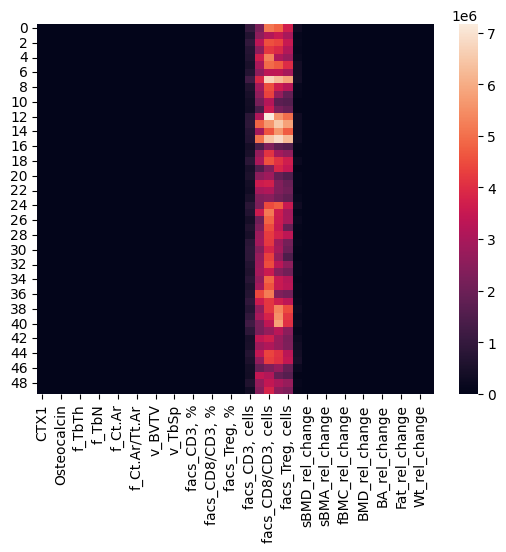

In [24]:
htmap= week8_num.drop(columns=['Groups'],axis=1)
sns.heatmap(htmap)

In [25]:
corr_table=week8_num.corr(numeric_only=True)
fBVTV_corr=corr_table['f_BVTV']
fBVTV_corr.sort_values(ascending=False)

f_BVTV                           1.000000
f_TbN                            0.976397
v_BVTV                           0.925643
f_TbTh                           0.891249
v_TbTh                           0.890432
f_Ct.Th                          0.799064
f_Ct.Ar/Tt.Ar                    0.796731
v_TbN                            0.759772
fBMD_rel_change                  0.637937
f_Ct.Ar                          0.599398
fBMC_rel_change                  0.512863
BMC_rel_change                   0.500017
BMD_rel_change                   0.446964
sBMC_rel_change                  0.390060
facs_CD8/CD3, %                  0.381528
sBMD_rel_change                  0.368216
facs_CD3, %                      0.242771
BA_rel_change                    0.238932
sBMA_rel_change                  0.231152
facs_CD8/CD3, cells              0.131271
facs_CD4/CD3, %                  0.103980
Lean_rel_change                  0.027819
facs_CD3, cells                  0.021706
fBMA_rel_change                  0.020057
facs_CD25CD4/CD3, %             -0.018619
facs_Th17, %                    -0.068602
facs_CD4/CD3, cells             -0.072224
facs_Treg, %                    -0.144214
weekly_body_weight_rel_change   -0.149882
facs_Th17, cells                -0.153524
Wt_rel_change                   -0.156536
CTX1                            -0.174520
facs_CD25CD4/CD3, cells         -0.182363
facs_Treg, cells                -0.241554
f_Tt.Ar                         -0.250906
Fat_rel_change                  -0.267268
Fatp_rel_change                 -0.298866
P1NP                            -0.318080
Osteocalcin                     -0.356010
v_TbSp                          -0.571784
f_Ma.A                          -0.641133
f_TbSp                          -0.936157
Name: f_BVTV, dtype: float64

In [26]:
vBVTV_corr=corr_table['v_BVTV']
vBVTV_corr.sort_values(ascending=False)

v_BVTV                           1.000000
f_BVTV                           0.925643
v_TbTh                           0.925340
f_TbN                            0.894719
v_TbN                            0.879624
f_TbTh                           0.856727
f_Ct.Th                          0.830502
f_Ct.Ar/Tt.Ar                    0.775116
f_Ct.Ar                          0.667080
fBMD_rel_change                  0.657443
BMC_rel_change                   0.526828
sBMD_rel_change                  0.523073
sBMC_rel_change                  0.476041
fBMC_rel_change                  0.474738
BMD_rel_change                   0.451038
facs_CD8/CD3, %                  0.355127
facs_CD3, %                      0.292654
BA_rel_change                    0.271034
sBMA_rel_change                  0.206389
facs_CD8/CD3, cells              0.143006
facs_CD4/CD3, %                  0.073652
facs_CD3, cells                  0.072323
Lean_rel_change                  0.009245
facs_CD25CD4/CD3, %              0.003955
fBMA_rel_change                 -0.031498
facs_Th17, %                    -0.048040
facs_CD4/CD3, cells             -0.069545
facs_Th17, cells                -0.123903
facs_Treg, %                    -0.130069
facs_CD25CD4/CD3, cells         -0.146484
Wt_rel_change                   -0.146994
f_Tt.Ar                         -0.153452
weekly_body_weight_rel_change   -0.161384
CTX1                            -0.168661
facs_Treg, cells                -0.212890
Osteocalcin                     -0.254397
Fat_rel_change                  -0.255301
Fatp_rel_change                 -0.277295
P1NP                            -0.341119
f_Ma.A                          -0.580312
v_TbSp                          -0.684523
f_TbSp                          -0.850208
Name: v_BVTV, dtype: float64

<Axes: >

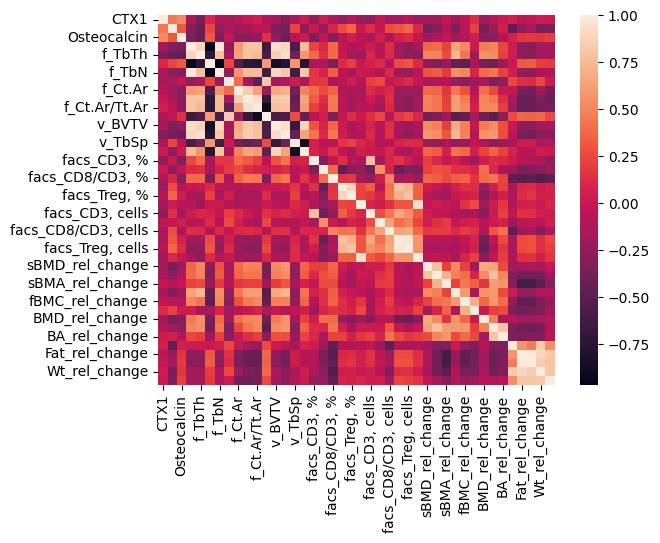

In [27]:
sns.heatmap(corr_table)

In [28]:
#sns.pairplot(week8_num)

# Linear Regression Model
Replaced NaN values with group means(SHAM_CON, SHAM_GOS, OVX_CON, OVX_GOS) for each feature(CTX1,P1NP,etc)

Bone biomarkers(osteocalcin, ctx1, p1np) vs response variable(v_BVTV or f_BVTV)

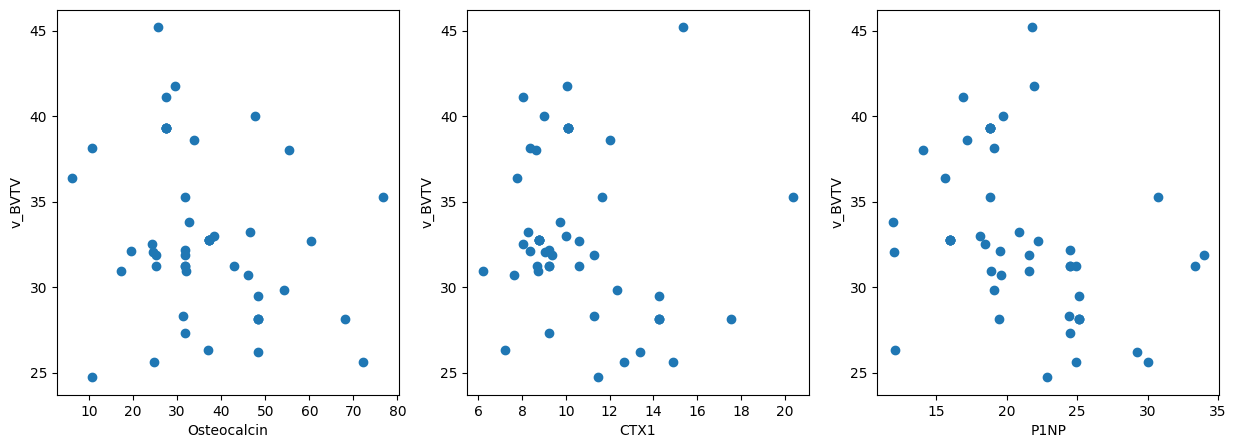

In [29]:
fig, axes = subplots(nrows=1,
                     ncols=3,
                     figsize=(15, 5))

axes[0].scatter(week8_num['Osteocalcin'],week8_num['v_BVTV'])
axes[0].set_xlabel('Osteocalcin')
axes[0].set_ylabel('v_BVTV')

axes[1].scatter(week8_num['CTX1'],week8_num['v_BVTV'])
axes[1].set_xlabel('CTX1')
axes[1].set_ylabel('v_BVTV')

axes[2].scatter(week8_num['P1NP'],week8_num['v_BVTV'])
axes[2].set_xlabel('P1NP')
axes[2].set_ylabel('v_BVTV')

plt.show()

In [30]:
y=week8_num['v_BVTV']
X=pd.DataFrame({'intercept': np.ones(50), 'Osteocalcin': week8_num['Osteocalcin'], 'CTX1': week8_num['CTX1'], 'P1NP': week8_num['P1NP']})
print(X)

    intercept  Osteocalcin       CTX1       P1NP
0         1.0    43.001483   8.678396  33.352875
1         1.0    25.214914  10.621891  24.924023
2         1.0    17.316432   8.724400  18.915117
3         1.0    31.807210   9.229523  24.513621
4         1.0    60.376019  10.588232  22.263223
5         1.0    31.918405   6.193446  21.564442
6         1.0    31.807210   9.229523  24.513621
7         1.0    31.807210   9.363910  33.984705
8         1.0    19.608305   8.359306  19.519946
9         1.0    25.214914  11.306601  21.584637
10        1.0    31.807210   9.229523  24.513621
11        1.0    31.807210   9.229523  24.513621
12        1.0    31.284779  11.306601  24.451635
13        1.0    48.310988  13.405773  29.223103
14        1.0    72.189993  12.671102  30.053372
15        1.0    48.310988  14.256822  25.105673
16        1.0    76.750690  20.403581  30.727307
17        1.0    10.770843  11.463753  22.879739
18        1.0    54.242681  12.321855  19.126278
19        1.0    48.

In [31]:
model=sm.OLS(y,X)
results=model.fit()
summarize(results)

coef  std err       t  P>|t|
intercept    40.1289    3.113  12.889  0.000
Osteocalcin  -0.0620    0.052  -1.201  0.236
CTX1          0.1134    0.290   0.391  0.697
P1NP         -0.2917    0.144  -2.031  0.048

In [32]:
results.params

intercept      40.128889
Osteocalcin    -0.062042
CTX1            0.113382
P1NP           -0.291721
dtype: float64

In [33]:
results.params[1]

/tmp/ipython-input-3757596193.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  results.params[1]


np.float64(-0.06204228656560458)

/tmp/ipython-input-3552946234.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  results.params[0],
/tmp/ipython-input-3552946234.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  results.params[1],
/tmp/ipython-input-3552946234.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  results.params[0],
/tmp/ipython-input-3552946234.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future versi

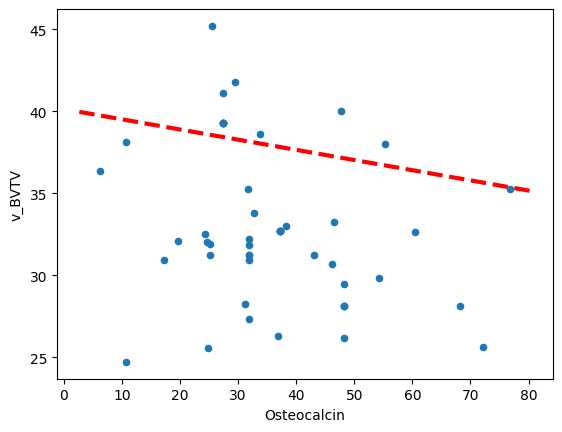

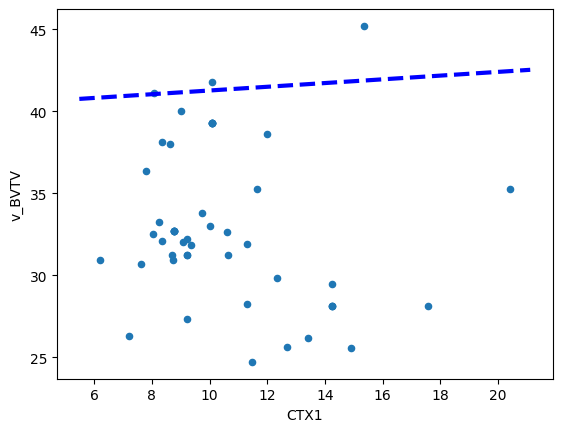

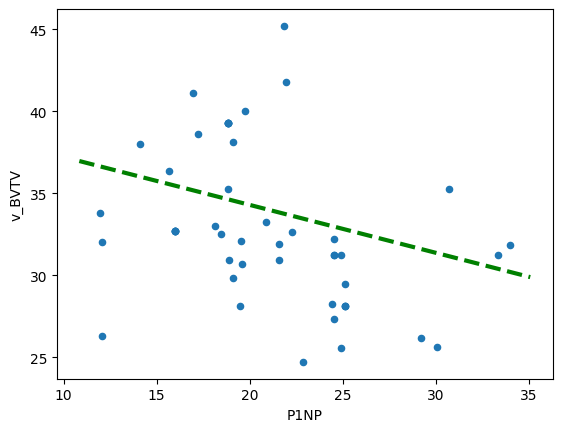

In [34]:
def abline(ax, b, m, *args, **kwargs):
    "Add a line with slope m and intercept b to ax"
    xlim = ax.get_xlim()
    ylim = [m * xlim[0] + b, m * xlim[1] + b]
    ax.plot(xlim, ylim, *args, **kwargs)


ax = week8_num.plot.scatter('Osteocalcin', 'v_BVTV')
abline(ax,
       results.params[0],
       results.params[1],
       'r--',
       linewidth=3)

ax = week8_num.plot.scatter('CTX1', 'v_BVTV')
abline(ax,
       results.params[0],
       results.params[2],
       'b--',
       linewidth=3)

ax = week8_num.plot.scatter('P1NP', 'v_BVTV')
abline(ax,
       results.params[0],
       results.params[3],
       'g--',
       linewidth=3)

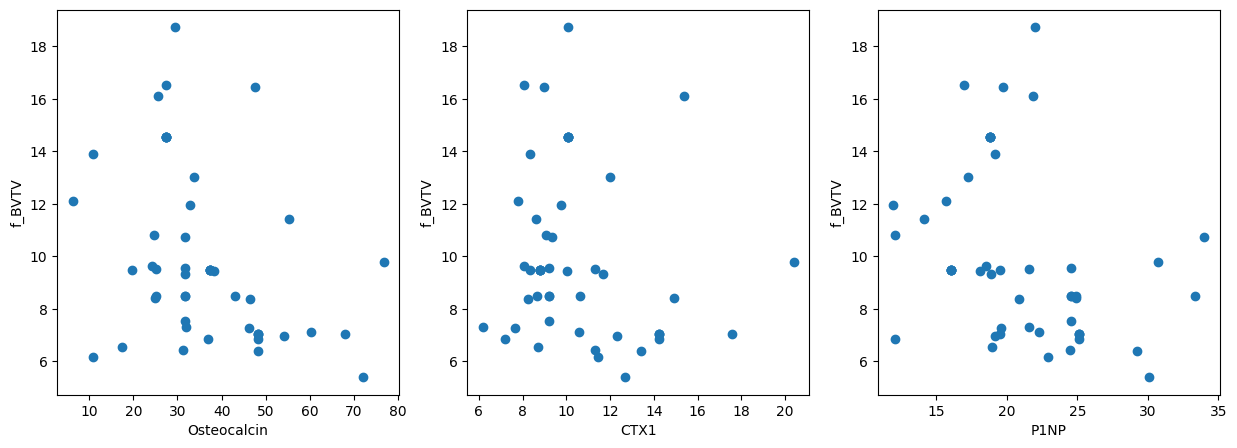

In [35]:
fig, axes = subplots(nrows=1,
                     ncols=3,
                     figsize=(15, 5))

axes[0].scatter(week8_num['Osteocalcin'],week8_num['f_BVTV'])
axes[0].set_xlabel('Osteocalcin')
axes[0].set_ylabel('f_BVTV')

axes[1].scatter(week8_num['CTX1'],week8_num['f_BVTV'])
axes[1].set_xlabel('CTX1')
axes[1].set_ylabel('f_BVTV')

axes[2].scatter(week8_num['P1NP'],week8_num['f_BVTV'])
axes[2].set_xlabel('P1NP')
axes[2].set_ylabel('f_BVTV')

plt.show()

In [36]:
y=week8_num['f_BVTV']
X=pd.DataFrame({'intercept': np.ones(50), 'Osteocalcin': week8_num['Osteocalcin'], 'CTX1': week8_num['CTX1'], 'P1NP': week8_num['P1NP']})
print(X)

    intercept  Osteocalcin       CTX1       P1NP
0         1.0    43.001483   8.678396  33.352875
1         1.0    25.214914  10.621891  24.924023
2         1.0    17.316432   8.724400  18.915117
3         1.0    31.807210   9.229523  24.513621
4         1.0    60.376019  10.588232  22.263223
5         1.0    31.918405   6.193446  21.564442
6         1.0    31.807210   9.229523  24.513621
7         1.0    31.807210   9.363910  33.984705
8         1.0    19.608305   8.359306  19.519946
9         1.0    25.214914  11.306601  21.584637
10        1.0    31.807210   9.229523  24.513621
11        1.0    31.807210   9.229523  24.513621
12        1.0    31.284779  11.306601  24.451635
13        1.0    48.310988  13.405773  29.223103
14        1.0    72.189993  12.671102  30.053372
15        1.0    48.310988  14.256822  25.105673
16        1.0    76.750690  20.403581  30.727307
17        1.0    10.770843  11.463753  22.879739
18        1.0    54.242681  12.321855  19.126278
19        1.0    48.

In [37]:
model=sm.OLS(y,X)
results=model.fit()
summarize(results)

coef  std err      t  P>|t|
intercept    14.7933    2.080  7.112  0.000
Osteocalcin  -0.0731    0.035 -2.117  0.040
CTX1          0.1290    0.194  0.667  0.508
P1NP         -0.1695    0.096 -1.767  0.084

In [38]:
results.params

intercept      14.793278
Osteocalcin    -0.073082
CTX1            0.128997
P1NP           -0.169529
dtype: float64

/tmp/ipython-input-3274378866.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  results.params[0],
/tmp/ipython-input-3274378866.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  results.params[1],
/tmp/ipython-input-3274378866.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  results.params[0],
/tmp/ipython-input-3274378866.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future versi

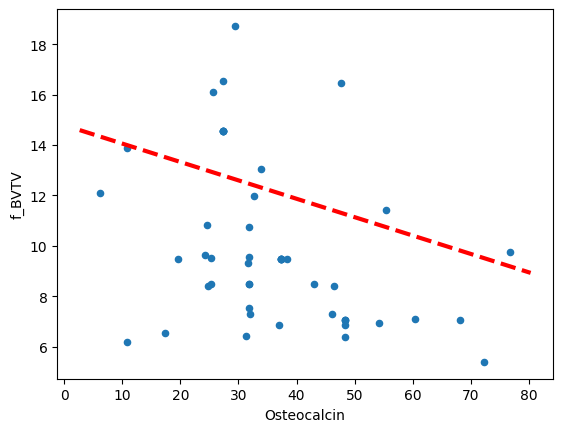

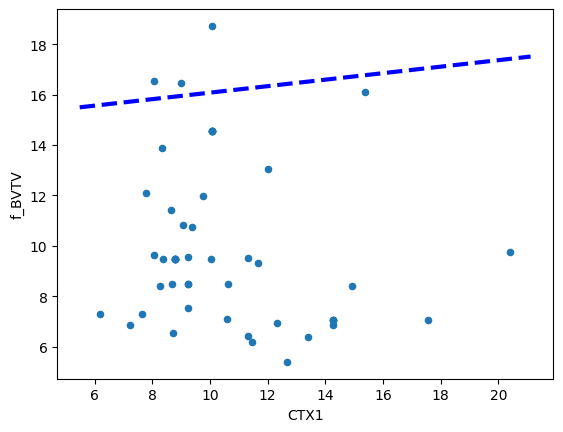

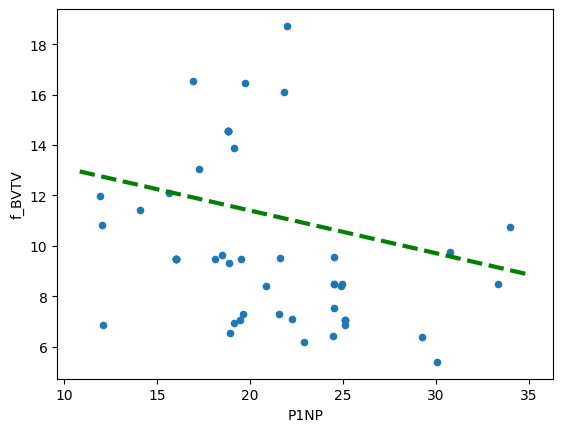

In [39]:
def abline(ax, b, m, *args, **kwargs):
    "Add a line with slope m and intercept b to ax"
    xlim = ax.get_xlim()
    ylim = [m * xlim[0] + b, m * xlim[1] + b]
    ax.plot(xlim, ylim, *args, **kwargs)


ax = week8_num.plot.scatter('Osteocalcin', 'f_BVTV')
abline(ax,
       results.params[0],
       results.params[1],
       'r--',
       linewidth=3)

ax = week8_num.plot.scatter('CTX1', 'f_BVTV')
abline(ax,
       results.params[0],
       results.params[2],
       'b--',
       linewidth=3)

ax = week8_num.plot.scatter('P1NP', 'f_BVTV')
abline(ax,
       results.params[0],
       results.params[3],
       'g--',
       linewidth=3)

# Principal Components Analysis

In [40]:
week8_num

CTX1       P1NP  Osteocalcin     f_BVTV    f_TbTh    f_TbSp  \
0    8.678396  33.352875    43.001483   8.468562  0.059497  0.287449   
1   10.621891  24.924023    25.214914   8.468562  0.059497  0.287449   
2    8.724400  18.915117    17.316432   6.533580  0.060940  0.314338   
3    9.229523  24.513621    31.807210   9.561600  0.061400  0.282400   
4   10.588232  22.263223    60.376019   7.097617  0.056343  0.293051   
5    6.193446  21.564442    31.918405   7.297900  0.058200  0.301600   
6    9.229523  24.513621    31.807210   8.468562  0.059497  0.287449   
7    9.363910  33.984705    31.807210  10.729665  0.058021  0.259600   
8    8.359306  19.519946    19.608305   9.479761  0.063193  0.277121   
9   11.306601  21.584637    25.214914   9.502290  0.061055  0.279668   
10   9.229523  24.513621    31.807210   7.546084  0.056821  0.291818   
11   9.229523  24.513621    31.807210   8.468562  0.059497  0.287449   
12  11.306601  24.451635    31.284779   6.416905  0.053910  0.308359   
13  13.405773  29.223103    48.310988   6.396768  0.056016  0.313107   
14  12.671102  30.053372    72.189993   5.391055  0.053981  0.307243   
15  14.256822  25.105673    48.310988   6.841239  0.053889  0.293742   
16  20.403581  30.727307    76.750690   9.772944  0.055007  0.263181   
17  11.463753  22.879739    10.770843   6.176383  0.056145  0.299415   
18  12.321855  19.126278    54.242681   6.945548  0.054754  0.298015   
19  14.256822  25.105673    48.310988   7.044081  0.054834  0.295991   
20  14.256822  25.105673    48.310988   7.044081  0.054834  0.295991   
21  14.256822  25.105673    48.310988   7.044081  0.054834  0.295991   
22  17.571660  19.483802    68.110899   7.044081  0.054834  0.295991   
23  14.910253  24.900145    24.827034   8.411803  0.054967  0.284869   
24  10.080685  18.826140    27.409559  14.541722  0.070520  0.253445   
25   9.002665  19.738325    47.695974  16.464109  0.070362  0.239621   
26  10.073351  21.972422    29.413434  18.732723  0.070731  0.220157   
27   8.344238  19.126278    10.770843  13.887900  0.068616  0.243989   
28  10.080685  18.826140    27.409559  14.541722  0.070520  0.253445   
29   7.780039  15.668973     6.226505  12.096842  0.067774  0.256677   
30  10.080685  18.826140    27.409559  14.541722  0.070520  0.253445   
31  11.996064  17.231206    33.849317  13.036060  0.071880  0.264899   
32   8.060115  16.931919    27.409559  16.546230  0.077128  0.255090   
33  10.024194  18.111352    38.305989   9.458395  0.064471  0.289839   
34  15.364816  21.828643    25.604849  16.111516  0.073198  0.257288   
35  10.080685  18.826140    27.409559  14.541722  0.070520  0.253445   
36  10.080685  18.826140    27.409559  14.541722  0.070520  0.253445   
37   8.045274  18.483049    24.249051   9.643020  0.057305  0.273860   
38   8.254073  20.870799    46.437761   8.389128  0.058152  0.296282   
39   7.634227  19.610620    46.188099   7.281459  0.059950  0.317209   
40   8.781726  16.001469    37.282753   9.464123  0.060376  0.282542   
41   8.781726  16.001469    37.282753   9.464123  0.060376  0.282542   
42   9.747833  11.944576    32.770993  11.969587  0.060739  0.261311   
43   8.781726  16.001469    37.282753   9.464123  0.060376  0.282542   
44   9.065028  12.047518    24.633863  10.822638  0.061056  0.275020   
45  11.657408  18.862713    31.706645   9.319933  0.056694  0.271575   
46   8.781726  16.001469    37.282753   9.464123  0.060376  0.282542   
47   8.632497  14.110485    55.331110  11.422694  0.064239  0.260071   
48   7.217470  12.081991    36.944498   6.864526  0.064875  0.305008   
49   8.781726  16.001469    37.282753   9.464123  0.060376  0.282542   

       f_TbN   f_Tt.Ar   f_Ct.Ar   f_Ct.Th  ...  fBMA_rel_change  \
0   1.422068  1.878465  0.981668  0.243372  ...         0.139535   
1   1.422068  1.878465  0.981668  0.243372  ...        -0.020408   
2   1.072141  1.888325  0.973667  0.240256  ...         0.043478   
3   1.557200  1.841247  0.981967  0.248929  ...         0.090909

In [41]:
sham_congrp=week8_num.loc[week8_num['Groups']=='SHAM_CON']
sham_congrp

CTX1       P1NP  Osteocalcin     f_BVTV    f_TbTh    f_TbSp  \
0    8.678396  33.352875    43.001483   8.468562  0.059497  0.287449   
1   10.621891  24.924023    25.214914   8.468562  0.059497  0.287449   
2    8.724400  18.915117    17.316432   6.533580  0.060940  0.314338   
3    9.229523  24.513621    31.807210   9.561600  0.061400  0.282400   
4   10.588232  22.263223    60.376019   7.097617  0.056343  0.293051   
5    6.193446  21.564442    31.918405   7.297900  0.058200  0.301600   
6    9.229523  24.513621    31.807210   8.468562  0.059497  0.287449   
7    9.363910  33.984705    31.807210  10.729665  0.058021  0.259600   
8    8.359306  19.519946    19.608305   9.479761  0.063193  0.277121   
9   11.306601  21.584637    25.214914   9.502290  0.061055  0.279668   
10   9.229523  24.513621    31.807210   7.546084  0.056821  0.291818   
11   9.229523  24.513621    31.807210   8.468562  0.059497  0.287449   

       f_TbN   f_Tt.Ar   f_Ct.Ar   f_Ct.Th  ...  fBMA_rel_change  \
0   1.422068  1.878465  0.981668  0.243372  ...         0.139535   
1   1.422068  1.878465  0.981668  0.243372  ...        -0.020408   
2   1.072141  1.888325  0.973667  0.240256  ...         0.043478   
3   1.557200  1.841247  0.981967  0.248929  ...         0.090909   
4   1.259711  1.879604  0.972052  0.238803  ...         0.020833   
5   1.253700  1.813841  0.933756  0.238065  ...         0.065217   
6   1.422068  1.878465  0.981668  0.243372  ...         0.062172   
7   1.849272  1.870477  0.990304  0.244555  ...         0.085106   
8   1.500129  2.007753  1.001075  0.241719  ...         0.041667   
9   1.556346  1.864078  1.018199  0.254409  ...         0.133333   
10  1.328040  1.862393  0.982325  0.240240  ...         0.041667   
11  1.422068  1.878465  0.981668  0.243372  ...         0.042553   

    BMD_rel_change  BMC_rel_change  BA_rel_change  Lean_rel_change  \
0         0.028681        0.079518       0.050441         0.037500   
1         0.032819        0.039312       0.005089         0.100000   
2         0.068392        0.126464       0.055767         0.056818   
3         0.028986        0.065217       0.034814         0.120482   
4         0.060078        0.108545       0.045292         0.018182   
5         0.086466        0.074419      -0.011139         0.054545   
6         0.068904        0.068754       0.001303         0.055302   
7         0.022263        0.024948       0.002240        -0.022857   
8         0.110902        0.010893      -0.090382         0.059524   
9         0.068140        0.107692       0.036993         0.005618   
10        0.165657        0.051919      -0.097098         0.111842   
11        0.085561        0.067368      -0.017689         0.066667   

    Fat_rel_change  Fatp_rel_change  Wt_rel_change  \
0         0.150000         0.080357       0.039216   
1         0.529412         0.298077       0.125000   
2         0.147059         0.055215       0.063025   
3         0.500000         0.260000       0.138756   
4         0.047619         0.026549       0.047619   
5         0.578947         0.390476       0.105769   
6         0.425428         0.286622       0.089418   
7         0.533333         0.444444       0.022936   
8         0.760000         0.523077       0.127854   
9         0.350000         0.320000       0.063348   
10        0.333333         0.211538       0.106599   
11        0.750000         0.543103       0.143478   

    weekly_body_weight_rel_change    Groups  
0                        0.075000  SHAM_CON  
1                        0.135417  SHAM_CON  
2                        0.117391  SHAM_CON  
3                        0.102804  SHAM_CON  
4                        0.017857  SHAM_CON  
5                        0.193717  SHAM_CON  
6                        0.094828  SHAM_CON  
7                        0.037559  SHAM_CON  
8                        0.138095  SHAM_CON  
9                        0.099057  SHAM_CON  
10                       0.080808  SHAM_CON  
11                   

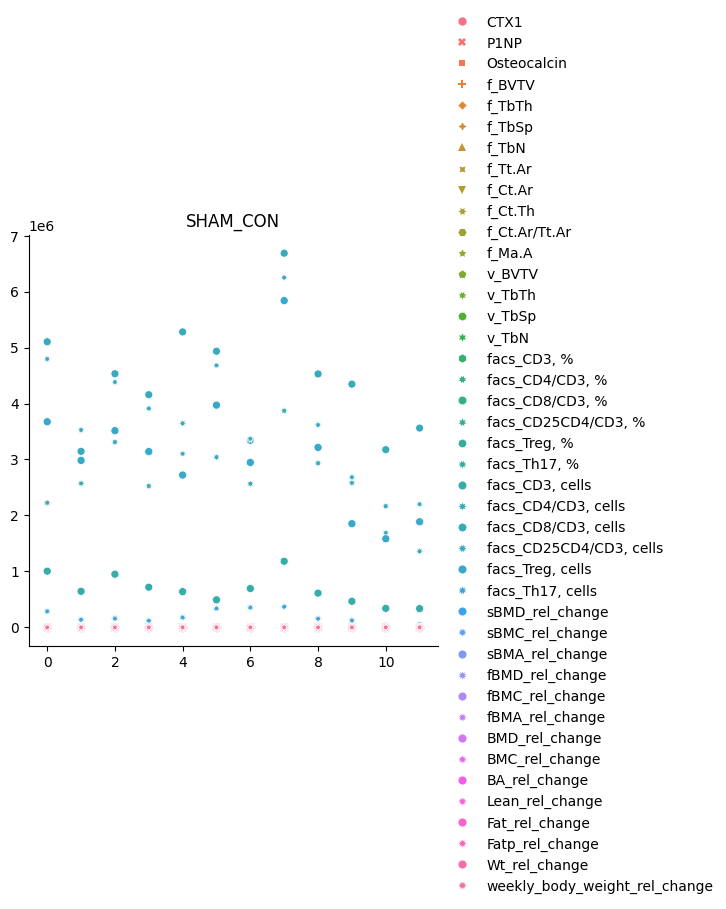

In [42]:
sns.relplot(data=sham_congrp).set(title='SHAM_CON')


In [43]:
sham_gosgrp=week8_num.loc[week8_num['Groups']=='SHAM_GOS']
sham_gosgrp

CTX1       P1NP  Osteocalcin     f_BVTV    f_TbTh    f_TbSp  \
24  10.080685  18.826140    27.409559  14.541722  0.070520  0.253445   
25   9.002665  19.738325    47.695974  16.464109  0.070362  0.239621   
26  10.073351  21.972422    29.413434  18.732723  0.070731  0.220157   
27   8.344238  19.126278    10.770843  13.887900  0.068616  0.243989   
28  10.080685  18.826140    27.409559  14.541722  0.070520  0.253445   
29   7.780039  15.668973     6.226505  12.096842  0.067774  0.256677   
30  10.080685  18.826140    27.409559  14.541722  0.070520  0.253445   
31  11.996064  17.231206    33.849317  13.036060  0.071880  0.264899   
32   8.060115  16.931919    27.409559  16.546230  0.077128  0.255090   
33  10.024194  18.111352    38.305989   9.458395  0.064471  0.289839   
34  15.364816  21.828643    25.604849  16.111516  0.073198  0.257288   
35  10.080685  18.826140    27.409559  14.541722  0.070520  0.253445   
36  10.080685  18.826140    27.409559  14.541722  0.070520  0.253445   

       f_TbN   f_Tt.Ar   f_Ct.Ar   f_Ct.Th  ...  fBMA_rel_change  \
24  2.053033  1.834400  1.000623  0.252409  ...         0.113636   
25  2.339899  1.897856  1.023807  0.252074  ...         0.000000   
26  2.648435  1.740114  0.972060  0.251595  ...         0.166667   
27  2.023990  1.707699  0.921124  0.242849  ...         0.068182   
28  2.053033  1.834400  1.000623  0.252409  ...         0.111111   
29  1.784871  1.911607  1.014005  0.247713  ...         0.062500   
30  2.053033  1.834400  1.000623  0.252409  ...         0.139535   
31  1.813599  1.934518  1.050489  0.257538  ...        -0.021277   
32  2.145308  1.673733  0.963746  0.259832  ...        -0.020833   
33  1.467074  1.884246  0.971162  0.238225  ...         0.021277   
34  2.201086  1.925427  1.088589  0.269446  ...        -0.078431   
35  2.053033  1.834400  1.000623  0.252409  ...         0.081633   
36  2.053033  1.834400  1.000623  0.252409  ...         0.000000   

    BMD_rel_change  BMC_rel_change  BA_rel_change  Lean_rel_change  \
24        0.075506        0.261614       0.173971         0.163743   
25        0.099448        0.130152       0.025882         0.091429   
26        0.060109        0.176755       0.111851         0.113208   
27        0.118217        0.230769       0.101370         0.100629   
28        0.089127        0.119910       0.026650         0.119318   
29        0.094518        0.186636       0.084146         0.087719   
30        0.154150        0.085919      -0.059179         0.193939   
31        0.102612        0.213429       0.102960         0.114650   
32        0.114662        0.107383      -0.022248         0.000000   
33        0.136095        0.196850       0.054594         0.042424   
34        0.139706        0.110883      -0.025670         0.238372   
35        0.109541        0.209150       0.088779         0.035897   
36        0.108456        0.129930       0.020228         0.134146   

    Fat_rel_change  Fatp_rel_change  Wt_rel_change  \
24        0.282051         0.069519       0.182203   
25        0.230769         0.100000       0.129464   
26        0.038462        -0.063830       0.095238   
27        0.000000        -0.074324       0.065728   
28        0.966667         0.604167       0.230435   
29        0.208333         0.089431       0.085202   
30        1.062500         0.593407       0.222222   
31        0.200000         0.071429       0.108374   
32        0.722222         0.584270       0.043290   
33        0.375000         0.257812       0.074074   
34        1.611111         0.925532       0.321267   
35        0.300000         0.192593       0.071429   
36        0.761905         0.443478       0.184834   

    weekly_body_weight_rel_change    Groups  
24                       0.313901  SHAM_GOS  
25                       0.258537  SHAM_GOS  
26                       0.156250  SHAM_GOS  
27                       0.153061  SHAM_GOS  
28                       0.205761  SHAM_GOS  
29                       0.179245

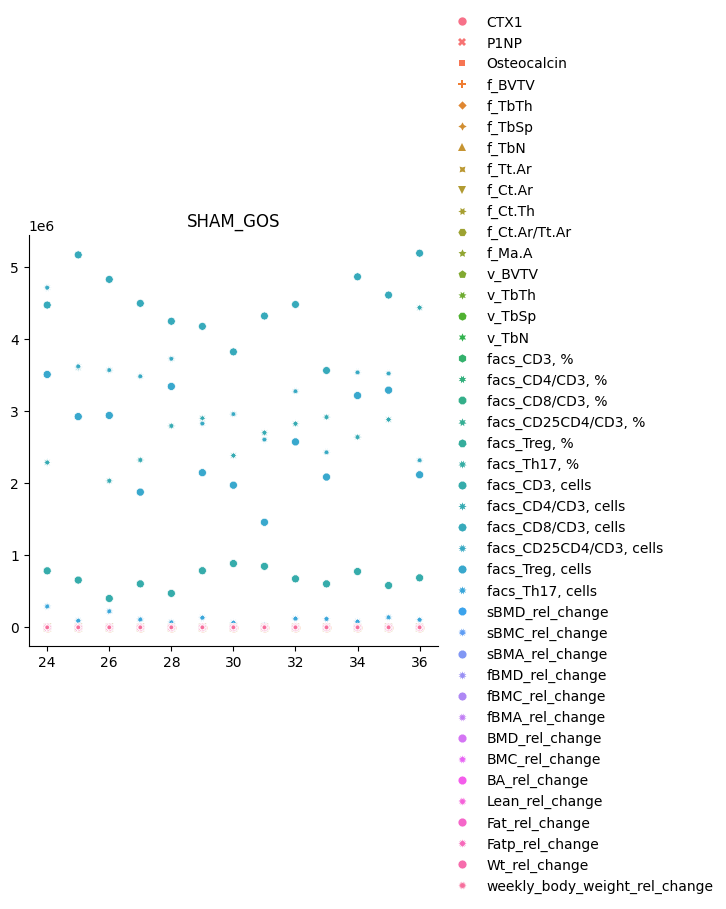

In [44]:
sns.relplot(data=sham_gosgrp).set(title='SHAM_GOS')

In [45]:
ovx_congrp=week8_num.loc[week8_num['Groups']=='OVX_CON']
ovx_congrp

CTX1       P1NP  Osteocalcin    f_BVTV    f_TbTh    f_TbSp     f_TbN  \
12  11.306601  24.451635    31.284779  6.416905  0.053910  0.308359  1.190309   
13  13.405773  29.223103    48.310988  6.396768  0.056016  0.313107  1.141954   
14  12.671102  30.053372    72.189993  5.391055  0.053981  0.307243  0.998697   
15  14.256822  25.105673    48.310988  6.841239  0.053889  0.293742  1.269501   
16  20.403581  30.727307    76.750690  9.772944  0.055007  0.263181  1.776662   
17  11.463753  22.879739    10.770843  6.176383  0.056145  0.299415  1.100080   
18  12.321855  19.126278    54.242681  6.945548  0.054754  0.298015  1.268503   
19  14.256822  25.105673    48.310988  7.044081  0.054834  0.295991  1.284506   
20  14.256822  25.105673    48.310988  7.044081  0.054834  0.295991  1.284506   
21  14.256822  25.105673    48.310988  7.044081  0.054834  0.295991  1.284506   
22  17.571660  19.483802    68.110899  7.044081  0.054834  0.295991  1.284506   
23  14.910253  24.900145    24.827034  8.411803  0.054967  0.284869  1.530339   

     f_Tt.Ar   f_Ct.Ar   f_Ct.Th  ...  fBMA_rel_change  BMD_rel_change  \
12  1.798385  0.895786  0.226794  ...         0.041667        0.029412   
13  1.925950  0.938506  0.228360  ...         0.063830        0.028463   
14  1.798585  0.897306  0.225269  ...         0.116279        0.045455   
15  1.884730  0.978266  0.240850  ...         0.136364        0.077652   
16  1.739921  0.939931  0.246484  ...         0.020408        0.054104   
17  1.852404  0.914205  0.226435  ...         0.085106        0.078431   
18  1.921019  0.968776  0.235856  ...         0.065217       -0.020833   
19  1.843755  0.936398  0.233248  ...         0.000000        0.012727   
20  1.843755  0.936398  0.233248  ...         0.040816        0.059273   
21  1.843755  0.936398  0.233248  ...         0.181818        0.056285   
22  1.843755  0.936398  0.233248  ...         0.111111        0.055344   
23  1.829043  0.958408  0.235939  ...         0.000000        0.054369   

    BMC_rel_change  BA_rel_change  Lean_rel_change  Fat_rel_change  \
12        0.182278       0.149871         0.020942        2.208333   
13        0.057971       0.027990         0.127660        1.206897   
14        0.069048       0.020457         0.080645        1.950000   
15        0.063781      -0.012034         0.066667        1.692308   
16        0.051392      -0.004587         0.112994        1.625000   
17        0.041002      -0.037123         0.124260        1.187500   
18       -0.006912       0.014616         0.230769        0.650000   
19       -0.040080      -0.052922         0.239521        1.400000   
20        0.061966       0.001117         0.100559        0.857143   
21        0.064220       0.006112         0.028249        0.523810   
22        0.092857       0.037500         0.144654       -0.038462   
23        0.049505      -0.006369         0.184049        1.555556   

    Fatp_rel_change  Wt_rel_change  weekly_body_weight_rel_change   Groups  
12         1.572727       0.235537                       0.460396  OVX_CON  
13         0.744361       0.252066                       0.421296  OVX_CON  
14         1.326531       0.225532                       0.404878  OVX_CON  
15         1.181034       0.236000                       0.363636  OVX_CON  
16         1.134146       0.223744                       0.363636  OVX_CON  
17         0.730337       0.172093                       0.297030  OVX_CON  
18         0.321429       0.247525                       0.300493  OVX_CON  
19         0.795181       0.298578                       0.263393  OVX_CON  
20         0.575342       0.155251                       0.142222  OVX_CON  
21         0.388889       0.085586                       0.192488  OVX_CON  
22        -0.141844       0.103286                       0.205000  OVX_CON  
23         0.939394       0.281553                       0.425641  OVX_CON  

[12 rows x 43 columns]

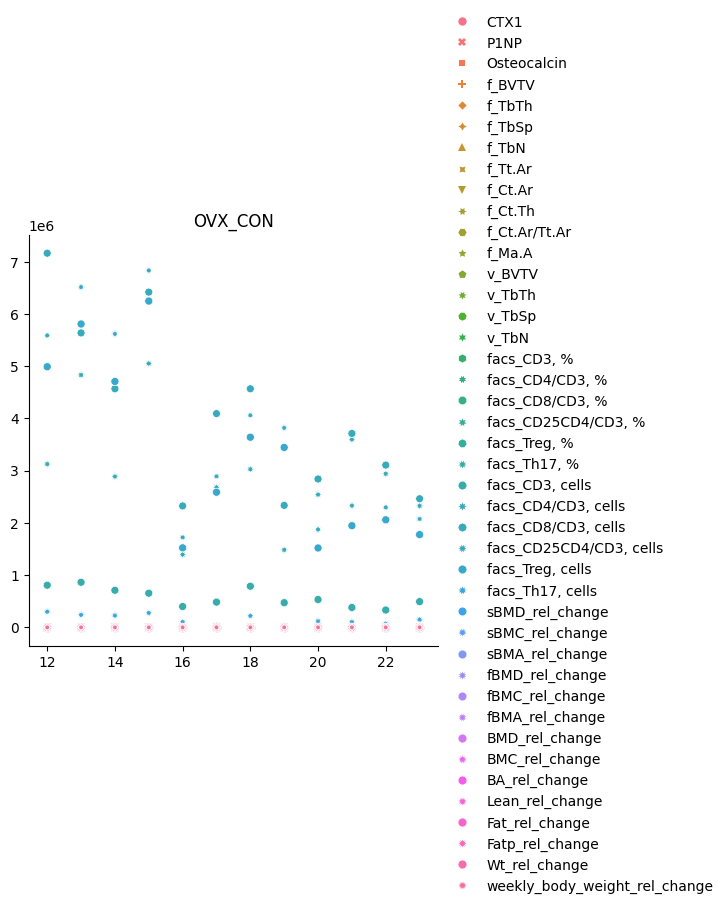

In [46]:
sns.relplot(data=ovx_congrp).set(title='OVX_CON')

In [47]:
ovx_gosgrp=week8_num.loc[week8_num['Groups']=='OVX_GOS']
ovx_gosgrp

CTX1       P1NP  Osteocalcin     f_BVTV    f_TbTh    f_TbSp  \
37   8.045274  18.483049    24.249051   9.643020  0.057305  0.273860   
38   8.254073  20.870799    46.437761   8.389128  0.058152  0.296282   
39   7.634227  19.610620    46.188099   7.281459  0.059950  0.317209   
40   8.781726  16.001469    37.282753   9.464123  0.060376  0.282542   
41   8.781726  16.001469    37.282753   9.464123  0.060376  0.282542   
42   9.747833  11.944576    32.770993  11.969587  0.060739  0.261311   
43   8.781726  16.001469    37.282753   9.464123  0.060376  0.282542   
44   9.065028  12.047518    24.633863  10.822638  0.061056  0.275020   
45  11.657408  18.862713    31.706645   9.319933  0.056694  0.271575   
46   8.781726  16.001469    37.282753   9.464123  0.060376  0.282542   
47   8.632497  14.110485    55.331110  11.422694  0.064239  0.260071   
48   7.217470  12.081991    36.944498   6.864526  0.064875  0.305008   
49   8.781726  16.001469    37.282753   9.464123  0.060376  0.282542   

       f_TbN   f_Tt.Ar   f_Ct.Ar   f_Ct.Th  ...  fBMA_rel_change  \
37  1.682744  1.987211  0.954348  0.226153  ...         0.020408   
38  1.442632  1.936775  0.946145  0.228769  ...        -0.080000   
39  1.214584  1.823306  0.931187  0.232706  ...         0.021739   
40  1.570419  1.887398  0.960863  0.236322  ...        -0.020000   
41  1.570419  1.887398  0.960863  0.236322  ...         0.111111   
42  1.970656  1.906551  0.970996  0.238682  ...         0.139535   
43  1.570419  1.887398  0.960863  0.236322  ...         0.022222   
44  1.772572  1.806473  0.954756  0.241733  ...         0.021739   
45  1.643897  1.849686  0.976600  0.242006  ...         0.133333   
46  1.570419  1.887398  0.960863  0.236322  ...         0.102041   
47  1.778148  1.909573  1.013075  0.248679  ...         0.044444   
48  1.058120  1.879609  0.939797  0.231850  ...        -0.157895   
49  1.570419  1.887398  0.960863  0.236322  ...         0.021739   

    BMD_rel_change  BMC_rel_change  BA_rel_change  Lean_rel_change  \
37       -0.009311       -0.024070      -0.015276         0.209945   
38        0.005725        0.023605       0.019123         0.163842   
39        0.080550        0.163366       0.076826         0.159091   
40        0.049524        0.039501      -0.009825         0.186170   
41        0.053950        0.032397      -0.029148         0.189944   
42        0.061303        0.086560       0.025000         0.190751   
43        0.044146        0.028235      -0.015912         0.174699   
44        0.127745        0.105634      -0.018824         0.189944   
45        0.077071        0.123487       0.043970         0.133333   
46        0.131827        0.077586      -0.048055         0.213198   
47        0.134875        0.063927      -0.060498         0.170213   
48        0.047801       -0.030568      -0.085616         0.285714   
49        0.110694        0.154378       0.040541         0.136126   

    Fat_rel_change  Fatp_rel_change  Wt_rel_change  \
37        2.142857         1.242718       0.336207   
38        2.411765         1.558140       0.299107   
39        2.090909         1.302752       0.330357   
40        3.555556         2.091954       0.393305   
41        1.684211         0.979592       0.278761   
42        1.571429         0.934579       0.300000   
43        1.294118         0.765957       0.238095   
44        1.842105         1.051020       0.295154   
45        1.000000         0.627907       0.208511   
46        2.478261         1.400000       0.410569   
47        1.304348         0.788991       0.256303   
48        3.384615         1.828947       0.447761   
49        1.695652         1.094340       0.269710   

    weekly_body_weight_rel_change   Groups  
37                       0.409910  OVX_GOS  
38                       0.418269  OVX_GOS  
39                       0.519802  OVX_GOS  
40                       0.563636  OVX_GOS  
41                       0.215447  OVX_GOS  
42                       0.375610  OVX_

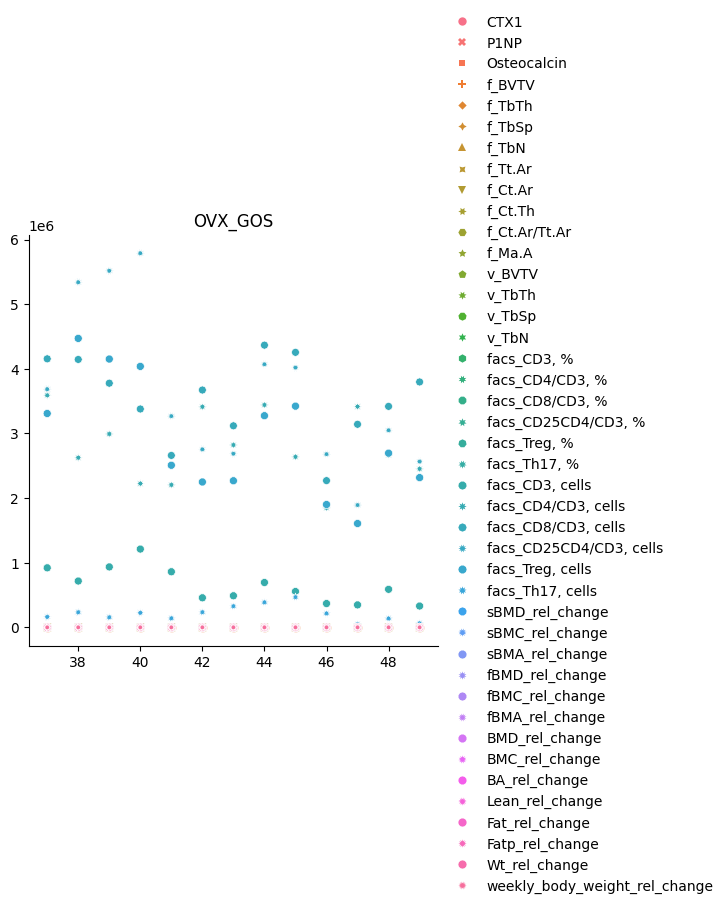

In [48]:
sns.relplot(data=ovx_gosgrp).set(title='OVX_GOS')

# PCA using full week 8 data set
too many labels, hard to read

In [49]:
scaler = StandardScaler(with_std=True,
                        with_mean=True)

week8_scaled = scaler.fit_transform(week8_num.drop(columns=['Groups']))

pcaweek8=PCA()
pcaweek8.fit(week8_scaled)

PCA()

In [50]:
week8_scaled

array([[-0.67589386,  2.46054862,  0.47688353, ..., -1.08714269,
        -1.41536464, -1.33329035],
       [ 0.02937232,  0.78652413, -0.74301902, ..., -0.67115578,
        -0.60663435, -0.91335257],
       [-0.65919961, -0.40688349, -1.28474117, ..., -1.13518112,
        -1.19090072, -1.03864136],
       ...,
       [-0.69254976, -1.36111447,  1.32251846, ...,  0.26681025,
         0.63121813,  1.23099613],
       [-1.20604261, -1.76398639,  0.06146161, ...,  2.25380613,
         2.43619181,  1.55327221],
       [-0.63839669, -0.98555281,  0.08466097, ...,  0.85022578,
         0.75761263,  1.32567804]])

In [51]:
pcaweek8.components_

array([[-3.99986148e-02, -7.48977986e-02, -9.98374978e-02, ...,
        -1.59729688e-01, -1.27310120e-01, -1.10791378e-01],
       [-4.75778446e-02,  2.11127758e-01, -2.27777875e-02, ...,
        -1.16444415e-01, -2.02598521e-01, -1.15409703e-01],
       [-1.33001006e-01, -1.44718149e-01, -6.11508632e-02, ...,
         2.86861211e-01,  3.00173634e-01,  2.65023650e-01],
       ...,
       [ 1.51542053e-02, -1.65299980e-02, -3.89186841e-03, ...,
         2.39458452e-02, -1.49441655e-03,  1.37055268e-02],
       [-6.34977967e-03, -1.03494573e-02,  1.09665187e-02, ...,
         1.34612168e-02,  4.11354506e-03, -8.57475441e-03],
       [-0.00000000e+00, -1.66533454e-16, -2.55032875e-16, ...,
        -2.38697950e-15, -3.33066907e-16, -5.75928194e-16]])

In [52]:
pcaweek8.components_.shape

(42, 42)

In [53]:
scores = pcaweek8.transform(week8_scaled)
scores

array([[-8.38399705e-01,  4.06628276e+00, -9.11602662e-01, ...,
         2.40784156e-02, -7.77500340e-04,  1.72510735e-16],
       [-1.44594442e+00, -2.03764376e-01, -8.08569241e-01, ...,
         4.02475321e-03, -1.15574209e-02,  1.34096756e-15],
       [-2.71754149e-01,  2.33009785e+00, -1.37690331e+00, ...,
         2.09222602e-02, -6.94747063e-03,  2.45032744e-15],
       ...,
       [ 2.18342452e+00, -4.67207263e+00, -1.71185515e-01, ...,
         1.34701139e-02,  4.84697803e-03,  6.97356345e-16],
       [-5.82682450e+00, -4.52189974e+00,  2.66653001e+00, ...,
         2.80666153e-03, -2.17429095e-03, -9.38706695e-16],
       [ 1.33809586e-01, -1.90879731e+00,  2.33206676e-02, ...,
        -1.35066702e-02, -1.27955555e-03, -1.11833231e-15]])

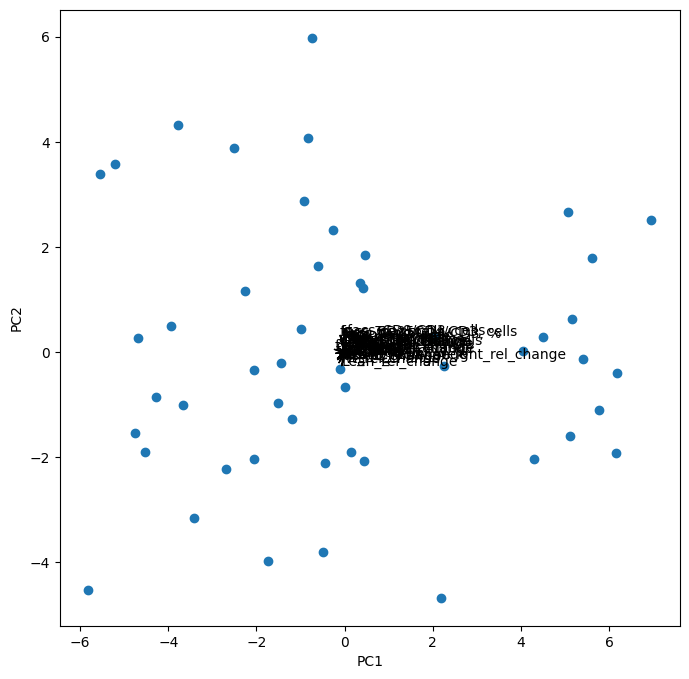

In [54]:
i, j = 0, 1 # which components
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.scatter(scores[:,0], scores[:,1])
ax.set_xlabel('PC%d' % (i+1))
ax.set_ylabel('PC%d' % (j+1))


for k in range(pcaweek8.components_.shape[1]):
    ax.arrow(0, 0, pcaweek8.components_[i,k], pcaweek8.components_[j,k])
    ax.text(pcaweek8.components_[i,k],
            pcaweek8.components_[j,k],
            week8_num.columns[k])


[Text(0.5, 1.0, 'Week 8 Scaled')]

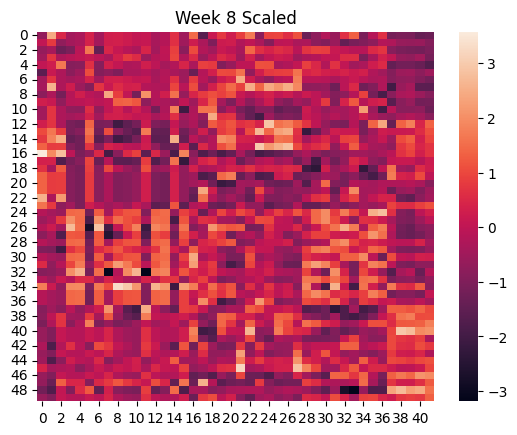

In [55]:
sns.heatmap(week8_scaled).set(title='Week 8 Scaled')

# PCA with Bone Biomarkers

In [56]:
cols=[0,1,2]
bone_data=week8_num.iloc[:,cols]
bone_data

CTX1       P1NP  Osteocalcin
0    8.678396  33.352875    43.001483
1   10.621891  24.924023    25.214914
2    8.724400  18.915117    17.316432
3    9.229523  24.513621    31.807210
4   10.588232  22.263223    60.376019
5    6.193446  21.564442    31.918405
6    9.229523  24.513621    31.807210
7    9.363910  33.984705    31.807210
8    8.359306  19.519946    19.608305
9   11.306601  21.584637    25.214914
10   9.229523  24.513621    31.807210
11   9.229523  24.513621    31.807210
12  11.306601  24.451635    31.284779
13  13.405773  29.223103    48.310988
14  12.671102  30.053372    72.189993
15  14.256822  25.105673    48.310988
16  20.403581  30.727307    76.750690
17  11.463753  22.879739    10.770843
18  12.321855  19.126278    54.242681
19  14.256822  25.105673    48.310988
20  14.256822  25.105673    48.310988
21  14.256822  25.105673    48.310988
22  17.571660  19.483802    68.110899
23  14.910253  24.900145    24.827034
24  10.080685  18.826140    27.409559
25   9.002665  19.738325    47.695974
26  10.073351  21.972422    29.413434
27   8.344238  19.126278    10.770843
28  10.080685  18.826140    27.409559
29   7.780039  15.668973     6.226505
30  10.080685  18.826140    27.409559
31  11.996064  17.231206    33.849317
32   8.060115  16.931919    27.409559
33  10.024194  18.111352    38.305989
34  15.364816  21.828643    25.604849
35  10.080685  18.826140    27.409559
36  10.080685  18.826140    27.409559
37   8.045274  18.483049    24.249051
38   8.254073  20.870799    46.437761
39   7.634227  19.610620    46.188099
40   8.781726  16.001469    37.282753
41   8.781726  16.001469    37.282753
42   9.747833  11.944576    32.770993
43   8.781726  16.001469    37.282753
44   9.065028  12.047518    24.633863
45  11.657408  18.862713    31.706645
46   8.781726  16.001469    37.282753
47   8.632497  14.110485    55.331110
48   7.217470  12.081991    36.944498
49   8.781726  16.001469    37.282753

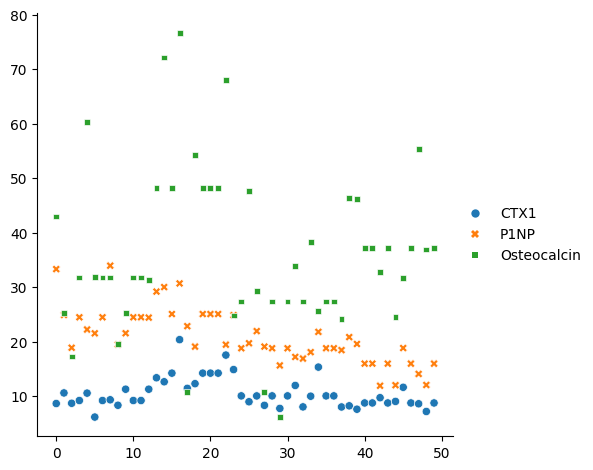

In [57]:
sns.relplot(data=bone_data)

In [58]:
scaler=StandardScaler(with_std=True,
                      with_mean=True)

bd_scaled=scaler.fit_transform(bone_data)
pcabd=PCA()
pcabd.fit(bd_scaled)
scores=pcabd.transform(bd_scaled)
scores

array([[ 1.16785697,  1.70328813, -1.57272679],
       [ 0.01499282,  1.06800787,  0.17519879],
       [-1.36162121,  0.54272632,  0.31952149],
       [-0.0851913 ,  0.781275  , -0.43645185],
       [ 1.10123054, -0.82524767, -0.97833232],
       [-1.08037975,  0.43819308, -1.10643445],
       [-0.0851913 ,  0.781275  , -0.43645185],
       [ 0.95165314,  2.24609561, -1.00201649],
       [-1.29012686,  0.55439156,  0.09271002],
       [-0.18513606,  0.52274513,  0.58046494],
       [-0.0851913 ,  0.781275  , -0.43645185],
       [-0.0851913 ,  0.781275  , -0.43645185],
       [ 0.35717728,  0.71199813,  0.17106152],
       [ 2.00523233,  0.65266306, -0.17872026],
       [ 2.86232507, -0.19575539, -1.33028   ],
       [ 1.76001404, -0.01990828,  0.3228834 ],
       [ 4.86000223, -0.58735337,  0.63067763],
       [-0.57749632,  1.3262161 ,  1.08176122],
       [ 0.91953571, -1.12189186, -0.06188865],
       [ 1.76001404, -0.01990828,  0.3228834 ],
       [ 1.76001404, -0.01990828,  0.322

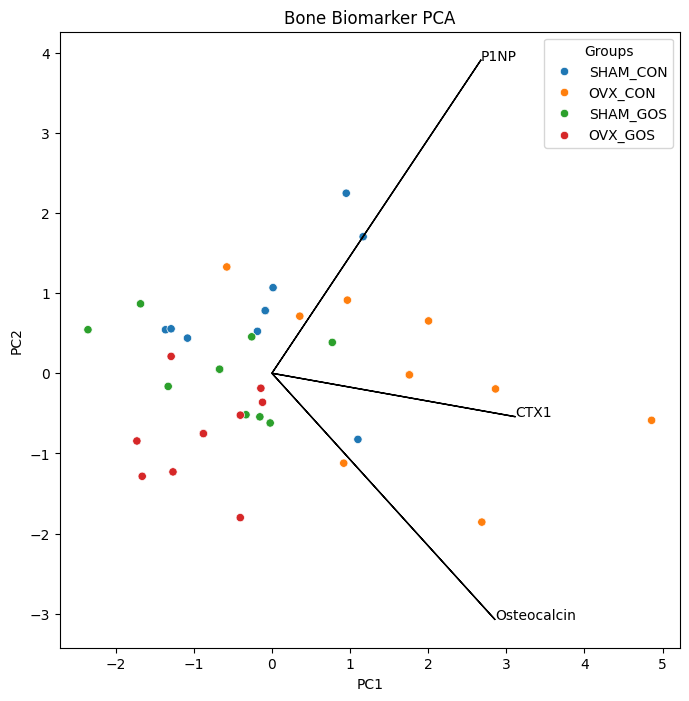

In [59]:
i,j = 0, 1 # which components
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax=sns.scatterplot(x=scores[:,0], y=scores[:,1], hue=week8_num['Groups'])
ax.set_xlabel('PC%d' % (i+1))
ax.set_ylabel('PC%d' % (j+1))
ax.set_title('Bone Biomarker PCA')

for k in range(pcabd.components_.shape[1]):
    ax.arrow(0, 0, pcabd.components_[i,k]*5, pcabd.components_[j,k]*5, color='k')
    ax.text(pcabd.components_[i,k]*5,
            pcabd.components_[j,k]*5,
            bone_data.columns[k])

In [60]:
pcabd.explained_variance_ratio_

array([0.6153038 , 0.23151452, 0.15318168])

# PCA with femur data

In [61]:
cols=[3,4,5,6,7,8,9,10,11]
femur_data=week8_num.iloc[:,cols]
femur_data

f_BVTV    f_TbTh    f_TbSp     f_TbN   f_Tt.Ar   f_Ct.Ar   f_Ct.Th  \
0    8.468562  0.059497  0.287449  1.422068  1.878465  0.981668  0.243372   
1    8.468562  0.059497  0.287449  1.422068  1.878465  0.981668  0.243372   
2    6.533580  0.060940  0.314338  1.072141  1.888325  0.973667  0.240256   
3    9.561600  0.061400  0.282400  1.557200  1.841247  0.981967  0.248929   
4    7.097617  0.056343  0.293051  1.259711  1.879604  0.972052  0.238803   
5    7.297900  0.058200  0.301600  1.253700  1.813841  0.933756  0.238065   
6    8.468562  0.059497  0.287449  1.422068  1.878465  0.981668  0.243372   
7   10.729665  0.058021  0.259600  1.849272  1.870477  0.990304  0.244555   
8    9.479761  0.063193  0.277121  1.500129  2.007753  1.001075  0.241719   
9    9.502290  0.061055  0.279668  1.556346  1.864078  1.018199  0.254409   
10   7.546084  0.056821  0.291818  1.328040  1.862393  0.982325  0.240240   
11   8.468562  0.059497  0.287449  1.422068  1.878465  0.981668  0.243372   
12   6.416905  0.053910  0.308359  1.190309  1.798385  0.895786  0.226794   
13   6.396768  0.056016  0.313107  1.141954  1.925950  0.938506  0.228360   
14   5.391055  0.053981  0.307243  0.998697  1.798585  0.897306  0.225269   
15   6.841239  0.053889  0.293742  1.269501  1.884730  0.978266  0.240850   
16   9.772944  0.055007  0.263181  1.776662  1.739921  0.939931  0.246484   
17   6.176383  0.056145  0.299415  1.100080  1.852404  0.914205  0.226435   
18   6.945548  0.054754  0.298015  1.268503  1.921019  0.968776  0.235856   
19   7.044081  0.054834  0.295991  1.284506  1.843755  0.936398  0.233248   
20   7.044081  0.054834  0.295991  1.284506  1.843755  0.936398  0.233248   
21   7.044081  0.054834  0.295991  1.284506  1.843755  0.936398  0.233248   
22   7.044081  0.054834  0.295991  1.284506  1.843755  0.936398  0.233248   
23   8.411803  0.054967  0.284869  1.530339  1.829043  0.958408  0.235939   
24  14.541722  0.070520  0.253445  2.053033  1.834400  1.000623  0.252409   
25  16.464109  0.070362  0.239621  2.339899  1.897856  1.023807  0.252074   
26  18.732723  0.070731  0.220157  2.648435  1.740114  0.972060  0.251595   
27  13.887900  0.068616  0.243989  2.023990  1.707699  0.921124  0.242849   
28  14.541722  0.070520  0.253445  2.053033  1.834400  1.000623  0.252409   
29  12.096842  0.067774  0.256677  1.784871  1.911607  1.014005  0.247713   
30  14.541722  0.070520  0.253445  2.053033  1.834400  1.000623  0.252409   
31  13.036060  0.071880  0.264899  1.813599  1.934518  1.050489  0.257538   
32  16.546230  0.077128  0.255090  2.145308  1.673733  0.963746  0.259832   
33   9.458395  0.064471  0.289839  1.467074  1.884246  0.971162  0.238225   
34  16.111516  0.073198  0.257288  2.201086  1.925427  1.088589  0.269446   
35  14.541722  0.070520  0.253445  2.053033  1.834400  1.000623  0.252409   
36  14.541722  0.070520  0.253445  2.053033  1.834400  1.000623  0.252409   
37   9.643020  0.057305  0.273860  1.682744  1.987211  0.954348  0.226153   
38   8.389128  0.058152  0.296282  1.442632  1.936775  0.946145  0.228769   
39   7.281459  0.059950  0.317209  1.214584  1.823306  0.931187  0.232706   
40   9.464123  0.060376  0.282542  1.570419  1.887398  0.960863  0.236322   
41   9.464123  0.060376  0.282542  1.570419  1.887398  0.960863  0.236322   
42  11.969587  0.060739  0.261311  1.970656  1.906551  0.970996  0.238682   
43   9.464123  0.060376  0.282542  1.570419  1.887398  0.960863  0.236322   
44  10.822638  0.061056  0.275020  1.772572  1.806473  0.954756  0.241733   
45   9.319933  0.056694  0.271575  1.643897  1.849686  0.976600  0.242006   
46   9.464123  0.060376  0.282542  1.570419  1.887398  0.960863  0.236322   
47  11.422694  0.064239  0.260071  1.778148  1.909573  1.013075  0.248679   
48   6.864526  0.064875  0.305008  1.058120  1.879609  0.939797  0.231850   
49   9.464123  0.060376  0.282542  1.570419  1.887398  0.960863  0.236322   

    f_Ct.Ar/Tt.Ar    f_Ma.A  
0       52.282648  0.896797  
1       52.282648  

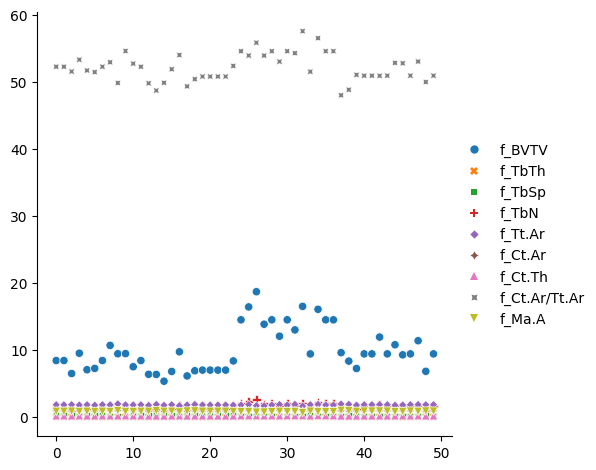

In [62]:
sns.relplot(data=femur_data)

In [63]:
scaler = StandardScaler(with_std=True,
                        with_mean=True)

fd_scaled = scaler.fit_transform(femur_data)
pcafd=PCA()
pcafd.fit(fd_scaled)

PCA()

In [64]:
scores=pcafd.transform(fd_scaled)
scores

array([[-4.92345955e-01,  3.13883605e-01,  7.38010316e-01,
        -1.47161180e-01, -5.96039915e-02,  4.39741339e-02,
        -8.39060933e-03,  8.43537168e-03,  8.41733585e-17],
       [-4.92345955e-01,  3.13883605e-01,  7.38010316e-01,
        -1.47161180e-01, -5.96039915e-02,  4.39741339e-02,
        -8.39060933e-03,  8.43537168e-03,  8.41733585e-17],
       [-1.87878268e+00,  3.22787386e-01,  1.43204282e+00,
         8.00965217e-01,  7.89963547e-02, -1.26600502e-02,
        -1.94049987e-02,  1.44250758e-02, -7.86131569e-17],
       [ 6.68194504e-01, -3.06143147e-01,  9.36899015e-01,
        -1.27846386e-01,  8.38777349e-03,  2.33661354e-01,
        -3.88087303e-02, -1.63629416e-02, -9.27265986e-17],
       [-1.50785590e+00,  1.27497819e-01,  7.81878886e-01,
        -3.24045013e-01, -1.43003863e-01, -9.40150731e-02,
         4.19998368e-02,  1.88960966e-02, -7.11730920e-16],
       [-1.58758118e+00, -1.36108006e+00,  5.52978249e-01,
         2.96678675e-01,  5.60227738e-02,  2.290224

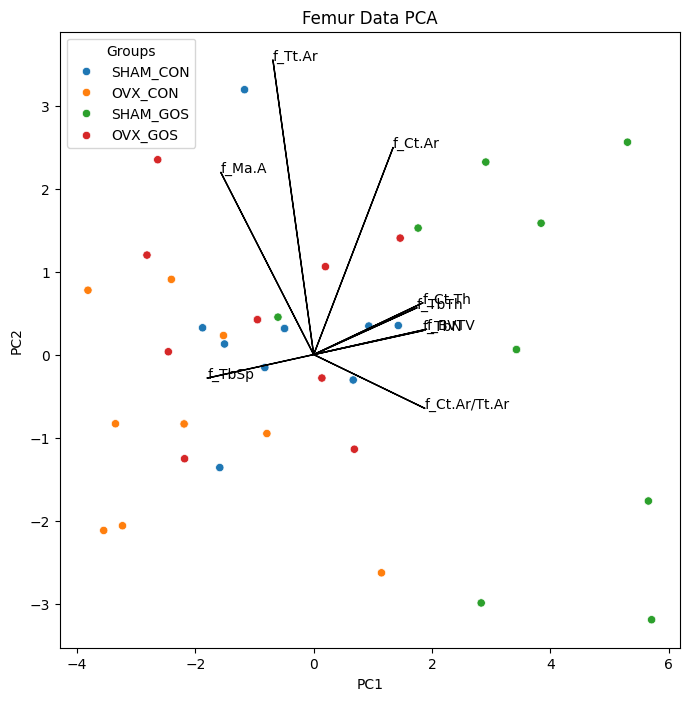

In [65]:
i,j = 0, 1 # which components
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax=sns.scatterplot(x=scores[:,0], y=scores[:,1], hue=week8_num['Groups'])
ax.set_xlabel('PC%d' % (i+1))
ax.set_ylabel('PC%d' % (j+1))
ax.set_title('Femur Data PCA')
for k in range(pcafd.components_.shape[1]):
    ax.arrow(0, 0, pcafd.components_[i,k]*5, pcafd.components_[j,k]*5, color='k')
    ax.text(pcafd.components_[i,k]*5,
            pcafd.components_[j,k]*5,
            femur_data.columns[k])

In [66]:
pcafd.explained_variance_ratio_

array([6.93329566e-01, 1.94500059e-01, 7.44847100e-02, 3.15440580e-02,
       4.07366511e-03, 1.76071053e-03, 2.04676203e-04, 1.02555574e-04,
       5.09529662e-32])

# PCA with vertebra data

In [67]:
cols=[12,13,14,15]
vert_data=week8_num.iloc[:,cols]
vert_data

v_BVTV    v_TbTh    v_TbSp     v_TbN
0   31.239273  0.075750  0.219781  4.124702
1   31.239273  0.075750  0.219781  4.124702
2   30.928378  0.076803  0.223905  4.026996
3   32.190367  0.076589  0.225093  4.203004
4   32.666919  0.074202  0.206039  4.402413
5   30.939512  0.075278  0.203662  4.110016
6   31.239273  0.075750  0.219781  4.124702
7   31.847096  0.075052  0.225071  4.243309
8   32.116595  0.078684  0.234937  4.081744
9   31.896445  0.074529  0.201188  4.279739
10  27.328875  0.074866  0.238357  3.650395
11  31.239273  0.075750  0.219781  4.124702
12  28.279323  0.069294  0.210670  4.081068
13  26.197085  0.067121  0.214540  3.902957
14  25.626672  0.066588  0.250663  3.848536
15  29.493818  0.067660  0.188371  4.359116
16  35.249103  0.072885  0.179111  4.836259
17  24.727450  0.068884  0.235314  3.589741
18  29.848998  0.073452  0.213370  4.063765
19  28.128296  0.069132  0.215103  4.061643
20  28.128296  0.069132  0.215103  4.061643
21  28.128296  0.069132  0.215103  4.061643
22  28.128296  0.069132  0.215103  4.061643
23  25.603915  0.067172  0.228782  3.811698
24  39.286056  0.086400  0.198421  4.541034
25  40.025134  0.086329  0.178454  4.636342
26  41.767585  0.087576  0.196152  4.769317
27  38.149921  0.082289  0.189300  4.636094
28  39.286056  0.086400  0.198421  4.541034
29  36.388199  0.087263  0.214151  4.169926
30  39.286056  0.086400  0.198421  4.541034
31  38.615857  0.087139  0.201862  4.431518
32  41.130834  0.088779  0.210202  4.632954
33  33.014519  0.081040  0.221728  4.073831
34  45.196397  0.090787  0.175520  4.978287
35  39.286056  0.086400  0.198421  4.541034
36  39.286056  0.086400  0.198421  4.541034
37  32.492108  0.071506  0.186253  4.543982
38  33.225739  0.076254  0.210476  4.357245
39  30.688920  0.074417  0.211014  4.123887
40  32.728256  0.075069  0.206332  4.353893
41  32.728256  0.075069  0.206332  4.353893
42  33.793181  0.072956  0.184131  4.632022
43  32.728256  0.075069  0.206332  4.353893
44  32.052210  0.077530  0.230440  4.134155
45  35.246090  0.077514  0.209533  4.547082
46  32.728256  0.075069  0.206332  4.353893
47  38.017579  0.079724  0.185177  4.768638
48  26.310220  0.070648  0.233636  3.724135
49  32.728256  0.075069  0.206332  4.353893

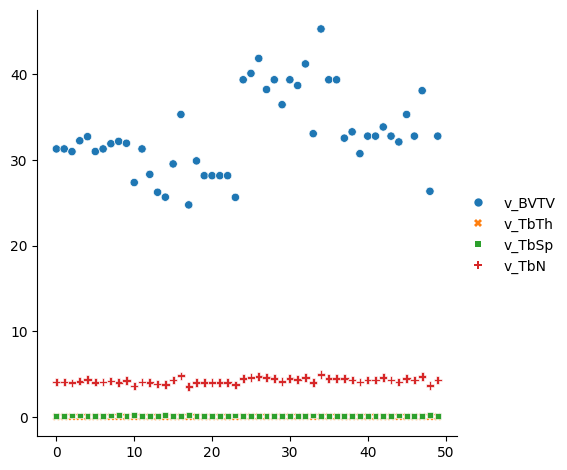

In [68]:
sns.relplot(data=vert_data)

In [69]:
scaler = StandardScaler(with_std=True,
                        with_mean=True)

vt_scaled = scaler.fit_transform(vert_data)
pcavt=PCA()
pcavt.fit(vt_scaled)
scores=pcavt.transform(vt_scaled)
scores

array([[-8.19374382e-01,  3.47235704e-01,  3.50582245e-02,
        -2.24446518e-02],
       [-8.19374382e-01,  3.47235704e-01,  3.50582245e-02,
        -2.24446518e-02],
       [-1.06537736e+00,  6.89706843e-01, -9.76216761e-02,
        -2.90829225e-02],
       [-6.65635367e-01,  6.18689521e-01,  3.96163375e-01,
        -2.24641860e-02],
       [ 1.00975270e-01, -5.30862126e-01,  2.76778926e-01,
        -1.95520508e-02],
       [-4.58489931e-01, -3.36015680e-01, -5.85855282e-01,
        -2.22242071e-02],
       [-8.19374382e-01,  3.47235704e-01,  3.50582245e-02,
        -2.24446518e-02],
       [-7.43319138e-01,  4.06765483e-01,  5.57857386e-01,
        -1.68079683e-02],
       [-1.01255293e+00,  1.32565813e+00,  3.76148787e-01,
        -3.59239539e-02],
       [-3.92801302e-02, -6.15544527e-01, -2.24200205e-01,
        -1.98026532e-02],
       [-2.67131547e+00,  1.21948799e+00, -4.18805514e-01,
        -1.36992724e-02],
       [-8.19374382e-01,  3.47235704e-01,  3.50582245e-02,
      

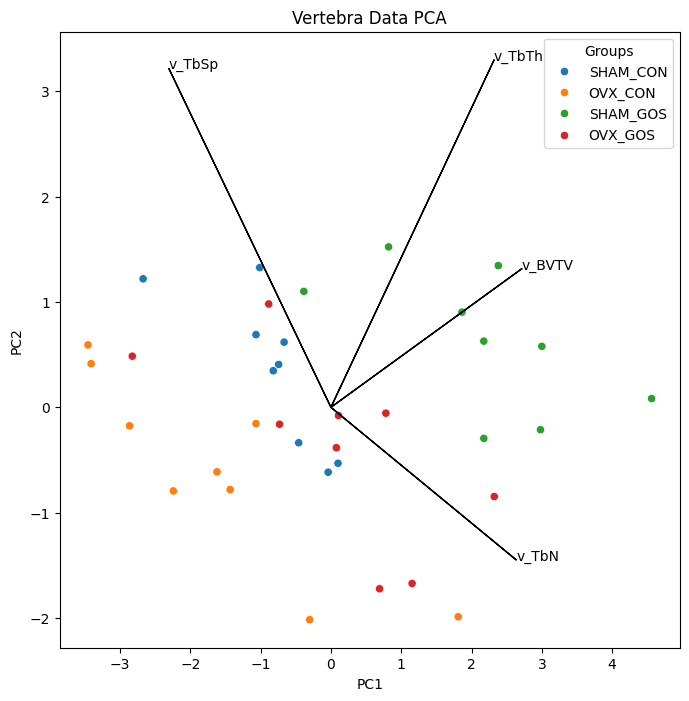

In [70]:
i,j = 0, 1 # which components
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax=sns.scatterplot(x=scores[:,0], y=scores[:,1], hue=week8_num['Groups'])
ax.set_xlabel('PC%d' % (i+1))
ax.set_ylabel('PC%d' % (j+1))
ax.set_title('Vertebra Data PCA')
for k in range(pcavt.components_.shape[1]):
    ax.arrow(0, 0, pcavt.components_[i,k]*5, pcavt.components_[j,k]*5, color='k')
    ax.text(pcavt.components_[i,k]*5,
            pcavt.components_[j,k]*5,
            vert_data.columns[k])

In [71]:
pcavt.explained_variance_ratio_

array([8.06325077e-01, 1.69450206e-01, 2.39284099e-02, 2.96306498e-04])

# PCA with FACS Data

In [72]:
cols=[16,17,18,19,20,21,22,23,24,25,26,27]
cyt_data=week8_num.iloc[:,cols]
cyt_data

facs_CD3, %  facs_CD4/CD3, %  facs_CD8/CD3, %  facs_CD25CD4/CD3, %  \
0      5.550000        12.300000            28.20            26.500000   
1      4.380000        17.500000            21.40            24.000000   
2      5.140000        17.900000            24.50            23.700000   
3      4.660000        16.400000            27.00            25.400000   
4      3.870000        22.100000            32.00            18.800000   
5      2.910000        18.000000            29.20            27.700000   
6      4.920000        18.200000            23.70            23.900000   
7      5.160000        16.900000            29.20            27.300000   
8      4.570000        21.900000            33.80            27.000000   
9      3.700000        20.500000            34.50            21.300000   
10     3.900000        24.900000            36.50            19.400000   
11     3.940000        16.000000            41.90            25.900000   
12     3.900000        15.100000            34.60            27.000000   
13     3.540000        19.800000            23.10            26.700000   
14     4.060000        16.500000            26.10            32.100000   
15     2.680000        20.700000            26.30            28.000000   
16     3.380000        11.800000            19.70            14.600000   
17     3.660000        20.300000            31.00            21.900000   
18     4.500000        17.300000            26.10            23.200000   
19     3.660000        11.500000            18.10            29.600000   
20     3.750000        17.900000            20.00            13.200000   
21     2.970000        28.100000            29.00            18.200000   
22     2.790000        24.700000            26.10            19.300000   
23     3.940000        18.600000            19.70            16.600000   
24     4.560000        13.300000            26.00            27.400000   
25     3.860000        21.200000            30.40            21.300000   
26     3.310000        16.800000            39.90            29.500000   
27     4.470000        17.200000            33.30            25.800000   
28     3.440000        20.400000            31.00            27.200000   
29     5.420000        20.000000            28.80            19.500000   
30     6.460000        17.400000            27.90            21.600000   
31     6.270000        20.000000            32.00            19.300000   
32     4.708333        19.641667            31.45            23.008333   
33     4.570000        22.100000            27.00            18.400000   
34     5.780000        19.700000            36.30            26.400000   
35     4.270000        21.200000            33.90            25.900000   
36     4.090000        26.400000            30.90            13.800000   
37     4.900000        19.100000            22.10            19.600000   
38     3.960000        14.500000            22.90            29.500000   
39     5.000000        16.000000            20.20            29.500000   
40     5.880000        10.800000            16.40            28.100000   
41     5.660000        14.500000            17.50            21.500000   
42     2.990000        22.300000            24.00            18.000000   
43     3.620000        20.900000            23.10            19.900000   
44     3.750000        18.600000            23.60            22.000000   
45     3.530000        16.800000            27.10            25.600000   
46     2.790000        14.000000            17.20            20.300000   
47     2.920000        28.700000            26.40            15.900000   
48     3.820000        17.300000            22.20            19.800000   
49     2.920000        21.700000            33.60            22.700000   

    facs_Treg, %  facs_Th17, %  facs_CD3, cells  facs_CD4/CD3, cells  \
0      20.300000        1.5800        1004550.0         2.226300e+06   
1      20.300000        0.9400         643860.0         2.572500e+06   
2      19.000

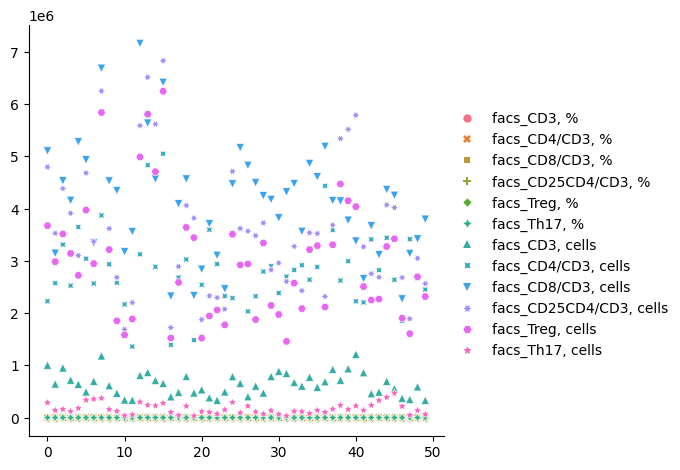

In [73]:
sns.relplot(data=cyt_data)

In [74]:
scaler = StandardScaler(with_std=True,
                        with_mean=True)

cyt_scaled = scaler.fit_transform(cyt_data)
pcacyt=PCA()
pcacyt.fit(cyt_scaled)
scores=pcacyt.transform(cyt_scaled)
scores

array([[ 2.64700968e+00, -1.74955481e+00,  7.26851294e-01,
         2.23814548e-01,  1.44981052e+00, -5.11488921e-01,
        -7.79030492e-02, -1.99804220e-01,  1.12465834e-01,
         9.05437124e-03,  7.95822608e-03,  2.54944623e-02],
       [-2.37060125e-01, -1.12834385e+00,  1.05684694e-03,
        -1.32937172e-01, -8.95730441e-01,  5.10543059e-01,
        -5.30415506e-02,  1.14720241e-01,  5.14764669e-02,
        -1.29928613e-02,  2.41708317e-02, -1.39624190e-02],
       [ 1.16249267e+00, -3.59459524e-01,  1.44543892e+00,
         1.00443481e+00, -2.77606645e-01,  1.13032399e-01,
         1.66292734e-02,  1.69550262e-02,  1.60939143e-02,
         1.81149754e-01, -2.78802630e-02,  8.60038469e-03],
       [ 3.97735824e-01, -6.84587025e-01,  8.95319623e-01,
        -6.08408866e-01, -2.44265827e-01, -1.01338136e-01,
         3.77832857e-02,  8.72982894e-02,  7.98072377e-02,
         7.82608279e-03, -2.28341536e-02,  1.91173539e-03],
       [-5.20772032e-01,  1.84073808e+00,  1.9097695

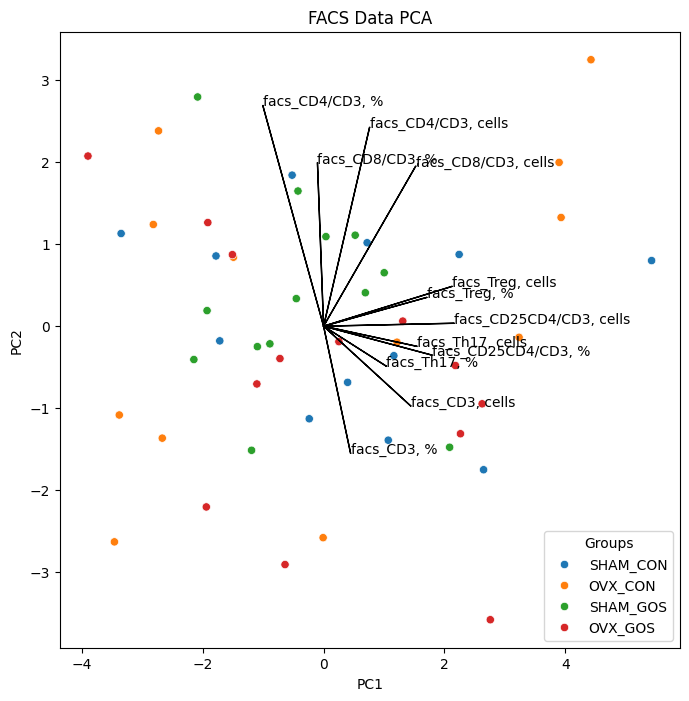

In [75]:
i,j = 0, 1 # which components
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax=sns.scatterplot(x=scores[:,0], y=scores[:,1], hue=week8_num['Groups'])
ax.set_xlabel('PC%d' % (i+1))
ax.set_ylabel('PC%d' % (j+1))
ax.set_title('FACS Data PCA')

for k in range(pcacyt.components_.shape[1]):
    ax.arrow(0, 0, pcacyt.components_[i,k]*5, pcacyt.components_[j,k]*5, color='k')
    ax.text(pcacyt.components_[i,k]*5,
            pcacyt.components_[j,k]*5,
            cyt_data.columns[k])

In [76]:
pcacyt.explained_variance_ratio_

array([4.13938311e-01, 1.83766701e-01, 1.49796755e-01, 1.30123012e-01,
       8.13855145e-02, 2.69661821e-02, 8.81589127e-03, 2.32550180e-03,
       1.25455248e-03, 1.11521447e-03, 4.60391966e-04, 5.19725029e-05])

# PCA with weight data

In [77]:
cols=[28,29,30,31,32,33,34,35,36,37,38,39,40,41]
wt_data=week8_num.iloc[:,cols]
wt_data

sBMD_rel_change  sBMC_rel_change  sBMA_rel_change  fBMD_rel_change  \
0         -0.053623        -0.034483         0.000000         0.062500   
1          0.062500        -0.040000        -0.073171         0.064815   
2          0.172956         0.280000         0.102564         0.105797   
3          0.060117         0.074074         0.025000         0.101449   
4          0.191379         0.200000         0.000000         0.132530   
5          0.136876         0.208333         0.051282         0.109827   
6          0.085414         0.093071         0.006807         0.077860   
7          0.006993        -0.030303        -0.042553         0.027064   
8          0.114569         0.100000        -0.023256         0.046154   
9          0.019802         0.103448         0.097561         0.042877   
10         0.117347         0.068966        -0.040816         0.075949   
11         0.110638         0.093750        -0.021739         0.087500   
12         0.170248         0.107143        -0.043478         0.041543   
13        -0.151745        -0.153846        -0.025000         0.110248   
14         0.045113         0.133333         0.066667         0.092683   
15         0.130106         0.222222         0.097561         0.057864   
16         0.062595        -0.031250        -0.081633         0.047552   
17         0.021886        -0.270270        -0.021739         0.029499   
18        -0.137881        -0.342105         0.048780         0.060870   
19        -0.038718        -0.058824        -0.022222         0.066667   
20        -0.098571         0.033333         0.162791         0.044053   
21         0.013216         0.030303         0.020833         0.017442   
22         0.088550         0.230769         0.100000         0.049931   
23        -0.064562        -0.161290        -0.090909         0.062407   
24         0.149630         0.384615         0.210526         0.140200   
25         0.124269         0.384615         0.210526         0.153090   
26         0.032670         0.137931         0.121951         0.183381   
27         0.136296         0.280000         0.108108         0.111601   
28         0.024422         0.031250         0.000000         0.185507   
29         0.188180         0.423077         0.195122         0.161337   
30         0.166927         0.178571         0.046512         0.100709   
31         0.283113         0.541667         0.200000         0.142446   
32         0.196875         0.064516        -0.104167         0.206231   
33         0.279720         0.416667         0.121951         0.181538   
34         0.306250         0.058824        -0.169811         0.237027   
35         0.254464         0.481481         0.175000         0.127005   
36         0.208207         0.280000         0.081081         0.179083   
37        -0.097372        -0.187500        -0.102041        -0.032353   
38         0.016026        -0.068966        -0.106383         0.070000   
39         0.269581         0.347826         0.071429         0.109256   
40         0.141156         0.000000        -0.122449         0.042936   
41        -0.025932        -0.107143        -0.086957         0.039589   
42         0.071313         0.115385         0.023810         0.102857   
43         0.026034         0.166667         0.135135         0.099561   
44         0.158645         0.166667         0.000000         0.126300   
45         0.298812         0.291667        -0.024390         0.069733   
46         0.043027        -0.088235        -0.137255         0.171303   
47         0.191388         0.222222         0.000000         0.080851   
48         0.035836        -0.074074        -0.127660         0.065850   
49         0.152648         0.192308         0.024390         0.154506   

    fBMC_rel_change  fBMA_rel_change  BMD_rel_change  BMC_rel_change  \
0          0.206897         0.139535        0.028681        0.079518   
1          0.031250        -0.020408        0.032819        0.039312   
2          0.

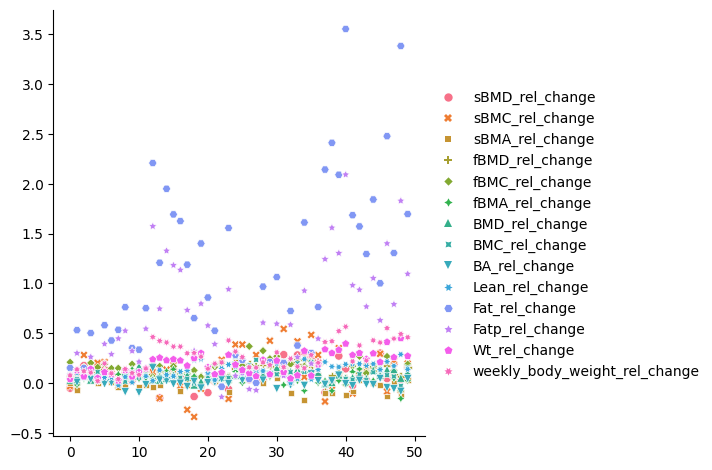

In [78]:
sns.relplot(data=wt_data)

In [79]:
scaler = StandardScaler(with_std=True,
                        with_mean=True)

wt_scaled = scaler.fit_transform(wt_data)
pcawt=PCA()
pcawt.fit(wt_scaled)
scores=pcawt.transform(wt_scaled)
scores

array([[-1.46299182e+00, -3.20517362e+00,  6.51507462e-01,
         3.47015749e-01, -1.28998241e-01, -8.90981906e-01,
        -1.99432483e-01,  3.88695050e-02, -1.10815721e-01,
         2.13970411e-01, -7.32521301e-02, -1.38120350e-01,
        -3.98627338e-02, -5.25967628e-02],
       [ 7.83982066e-01, -1.86946533e+00, -1.42210033e+00,
        -1.23403682e+00,  6.24970965e-01, -6.02782875e-01,
        -6.14680906e-01,  4.71119169e-02,  2.99097598e-01,
         1.18935858e-02,  1.43601690e-01, -2.45486845e-02,
        -3.09022607e-02, -4.69171494e-03],
       [-2.60575221e+00, -5.84461127e-01, -5.13462789e-01,
        -1.02407512e+00,  1.90687386e-01,  5.00689395e-02,
        -1.05605777e-01, -2.73136823e-01,  1.24611696e-01,
        -4.74700181e-02, -1.47595074e-02,  1.19647083e-02,
        -6.69702931e-02, -3.27587852e-02],
       [-8.61185948e-01, -1.51987822e+00,  2.94647382e-01,
         2.72865325e-01,  7.04983238e-01, -3.66428579e-01,
        -3.30559194e-01, -8.53209455e-01, -6.

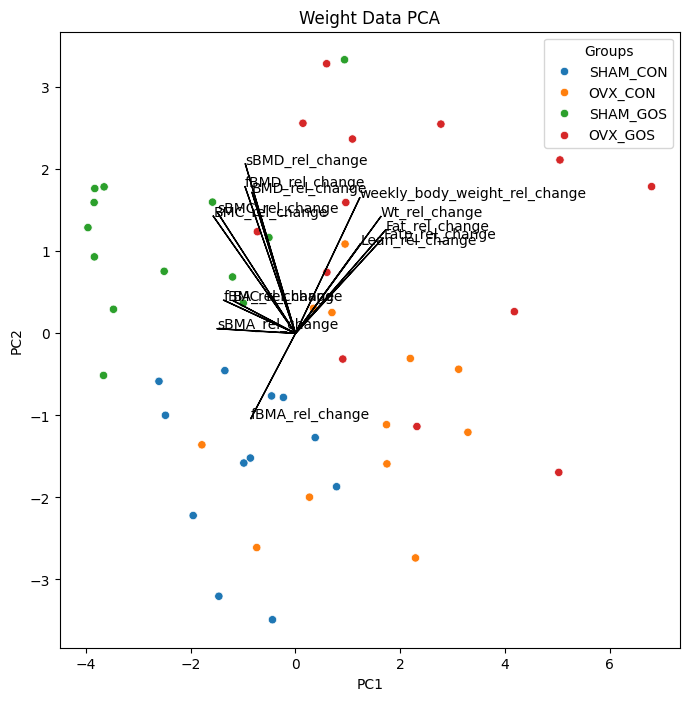

In [80]:
i,j = 0, 1 # which components
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax=sns.scatterplot(x=scores[:,0], y=scores[:,1], hue=week8_num['Groups'])
ax.set_xlabel('PC%d' % (i+1))
ax.set_ylabel('PC%d' % (j+1))
ax.set_title('Weight Data PCA')

for k in range(pcawt.components_.shape[1]):
    ax.arrow(0, 0, pcawt.components_[i,k]*5, pcawt.components_[j,k]*5, color='k')
    ax.text(pcawt.components_[i,k]*5,
            pcawt.components_[j,k]*5,
            wt_data.columns[k])

In [81]:
pcawt.explained_variance_ratio_

array([4.40472984e-01, 2.01678476e-01, 1.08211962e-01, 8.86232534e-02,
       5.97329569e-02, 4.76452825e-02, 2.15067337e-02, 1.66544879e-02,
       9.36061571e-03, 3.30811635e-03, 1.70315375e-03, 7.53075395e-04,
       2.55448146e-04, 9.34545783e-05])

# Explained Variance Ratio

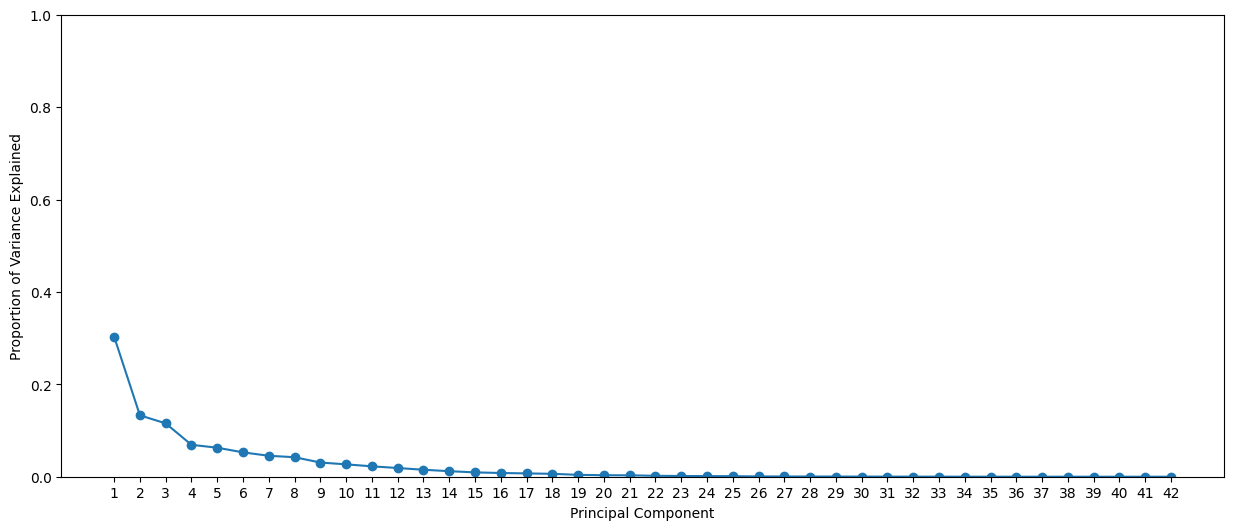

In [82]:
fig, ax = plt.subplots(figsize=(15, 6))
ticks = np.arange(pcaweek8.n_components_)+1
ax.plot(ticks,
        pcaweek8.explained_variance_ratio_,
        marker='o')
ax.set_xlabel('Principal Component');
ax.set_ylabel('Proportion of Variance Explained')
ax.set_ylim([0,1])
ax.set_xticks(ticks)


# PCA analysis with most important features
All features are included unlike PCA analysis in boneimmunedata_dropna notebook

In [83]:
allgrps=week8_num
allgrps

CTX1       P1NP  Osteocalcin     f_BVTV    f_TbTh    f_TbSp  \
0    8.678396  33.352875    43.001483   8.468562  0.059497  0.287449   
1   10.621891  24.924023    25.214914   8.468562  0.059497  0.287449   
2    8.724400  18.915117    17.316432   6.533580  0.060940  0.314338   
3    9.229523  24.513621    31.807210   9.561600  0.061400  0.282400   
4   10.588232  22.263223    60.376019   7.097617  0.056343  0.293051   
5    6.193446  21.564442    31.918405   7.297900  0.058200  0.301600   
6    9.229523  24.513621    31.807210   8.468562  0.059497  0.287449   
7    9.363910  33.984705    31.807210  10.729665  0.058021  0.259600   
8    8.359306  19.519946    19.608305   9.479761  0.063193  0.277121   
9   11.306601  21.584637    25.214914   9.502290  0.061055  0.279668   
10   9.229523  24.513621    31.807210   7.546084  0.056821  0.291818   
11   9.229523  24.513621    31.807210   8.468562  0.059497  0.287449   
12  11.306601  24.451635    31.284779   6.416905  0.053910  0.308359   
13  13.405773  29.223103    48.310988   6.396768  0.056016  0.313107   
14  12.671102  30.053372    72.189993   5.391055  0.053981  0.307243   
15  14.256822  25.105673    48.310988   6.841239  0.053889  0.293742   
16  20.403581  30.727307    76.750690   9.772944  0.055007  0.263181   
17  11.463753  22.879739    10.770843   6.176383  0.056145  0.299415   
18  12.321855  19.126278    54.242681   6.945548  0.054754  0.298015   
19  14.256822  25.105673    48.310988   7.044081  0.054834  0.295991   
20  14.256822  25.105673    48.310988   7.044081  0.054834  0.295991   
21  14.256822  25.105673    48.310988   7.044081  0.054834  0.295991   
22  17.571660  19.483802    68.110899   7.044081  0.054834  0.295991   
23  14.910253  24.900145    24.827034   8.411803  0.054967  0.284869   
24  10.080685  18.826140    27.409559  14.541722  0.070520  0.253445   
25   9.002665  19.738325    47.695974  16.464109  0.070362  0.239621   
26  10.073351  21.972422    29.413434  18.732723  0.070731  0.220157   
27   8.344238  19.126278    10.770843  13.887900  0.068616  0.243989   
28  10.080685  18.826140    27.409559  14.541722  0.070520  0.253445   
29   7.780039  15.668973     6.226505  12.096842  0.067774  0.256677   
30  10.080685  18.826140    27.409559  14.541722  0.070520  0.253445   
31  11.996064  17.231206    33.849317  13.036060  0.071880  0.264899   
32   8.060115  16.931919    27.409559  16.546230  0.077128  0.255090   
33  10.024194  18.111352    38.305989   9.458395  0.064471  0.289839   
34  15.364816  21.828643    25.604849  16.111516  0.073198  0.257288   
35  10.080685  18.826140    27.409559  14.541722  0.070520  0.253445   
36  10.080685  18.826140    27.409559  14.541722  0.070520  0.253445   
37   8.045274  18.483049    24.249051   9.643020  0.057305  0.273860   
38   8.254073  20.870799    46.437761   8.389128  0.058152  0.296282   
39   7.634227  19.610620    46.188099   7.281459  0.059950  0.317209   
40   8.781726  16.001469    37.282753   9.464123  0.060376  0.282542   
41   8.781726  16.001469    37.282753   9.464123  0.060376  0.282542   
42   9.747833  11.944576    32.770993  11.969587  0.060739  0.261311   
43   8.781726  16.001469    37.282753   9.464123  0.060376  0.282542   
44   9.065028  12.047518    24.633863  10.822638  0.061056  0.275020   
45  11.657408  18.862713    31.706645   9.319933  0.056694  0.271575   
46   8.781726  16.001469    37.282753   9.464123  0.060376  0.282542   
47   8.632497  14.110485    55.331110  11.422694  0.064239  0.260071   
48   7.217470  12.081991    36.944498   6.864526  0.064875  0.305008   
49   8.781726  16.001469    37.282753   9.464123  0.060376  0.282542   

       f_TbN   f_Tt.Ar   f_Ct.Ar   f_Ct.Th  ...  fBMA_rel_change  \
0   1.422068  1.878465  0.981668  0.243372  ...         0.139535   
1   1.422068  1.878465  0.981668  0.243372  ...        -0.020408   
2   1.072141  1.888325  0.973667  0.240256  ...         0.043478   
3   1.557200  1.841247  0.981967  0.248929  ...         0.090909

In [84]:
scaler = StandardScaler(with_std=True,
                        with_mean=True)

allgrps_scaled = scaler.fit_transform(allgrps.drop(columns=['Groups']))

pca_allgrps=PCA(n_components=3)
pca_allgrps.fit(allgrps_scaled)


PCA(n_components=3)

In [85]:
scores=pca_allgrps.transform(allgrps_scaled)
scores

array([[-8.38399705e-01,  4.06628276e+00, -9.11602662e-01],
       [-1.44594442e+00, -2.03764376e-01, -8.08569241e-01],
       [-2.71754149e-01,  2.33009785e+00, -1.37690331e+00],
       [ 4.14663282e-01,  1.22679860e+00, -7.89924622e-01],
       [ 3.48814032e-01,  1.30902752e+00, -2.83334730e+00],
       [-9.32228872e-01,  2.86449240e+00, -6.34796310e-01],
       [-6.05706531e-01,  1.63837860e+00, -9.35383831e-01],
       [-7.49521686e-01,  5.97919171e+00,  7.02153942e-01],
       [-9.93146190e-01,  4.30556423e-01, -5.71890333e-01],
       [ 2.02393434e+00,  2.94227943e-01, -3.01214716e+00],
       [-4.49379283e-01, -2.11890773e+00, -4.33470182e+00],
       [-1.36719966e-03, -6.66986890e-01, -2.06792899e+00],
       [-3.78412422e+00,  4.31630449e+00,  1.52582090e+00],
       [-5.54329901e+00,  3.38957978e+00,  5.38701673e-01],
       [-5.20624841e+00,  3.58549846e+00, -2.62072232e-01],
       [-2.51669964e+00,  3.88376851e+00,  1.02927376e+00],
       [-4.99032531e-01, -3.79863622e+00

In [86]:
pca_allgrps.components_

array([[-0.03999861, -0.0748978 , -0.0998375 ,  0.24773821,  0.24063574,
        -0.22992301,  0.23285982, -0.07836944,  0.18801574,  0.24708849,
         0.24630144, -0.2007539 ,  0.24862426,  0.25625911, -0.13795007,
         0.18603898,  0.06499434,  0.07359081,  0.1552296 , -0.02860601,
        -0.06681948, -0.03101569, -0.02176207, -0.01616913,  0.04690694,
        -0.08425149, -0.10192016, -0.06163442,  0.16423216,  0.18079829,
         0.12599148,  0.19744136,  0.17414621,  0.03452437,  0.17125421,
         0.19816408,  0.10209429, -0.06480878, -0.15609764, -0.15972969,
        -0.12731012, -0.11079138],
       [-0.04757784,  0.21112776, -0.02277779, -0.04153038, -0.0521461 ,
         0.05122276, -0.0462552 , -0.05045362, -0.04717392, -0.01834948,
        -0.0039054 , -0.02388802, -0.03519845, -0.01272327,  0.07987014,
        -0.05313222,  0.04627989, -0.08464825,  0.11662948,  0.28130494,
         0.26477423,  0.17061117,  0.18890923,  0.15084359,  0.32621566,
         0.31901

In [87]:
pca_allgrps.components_.shape

(3, 42)

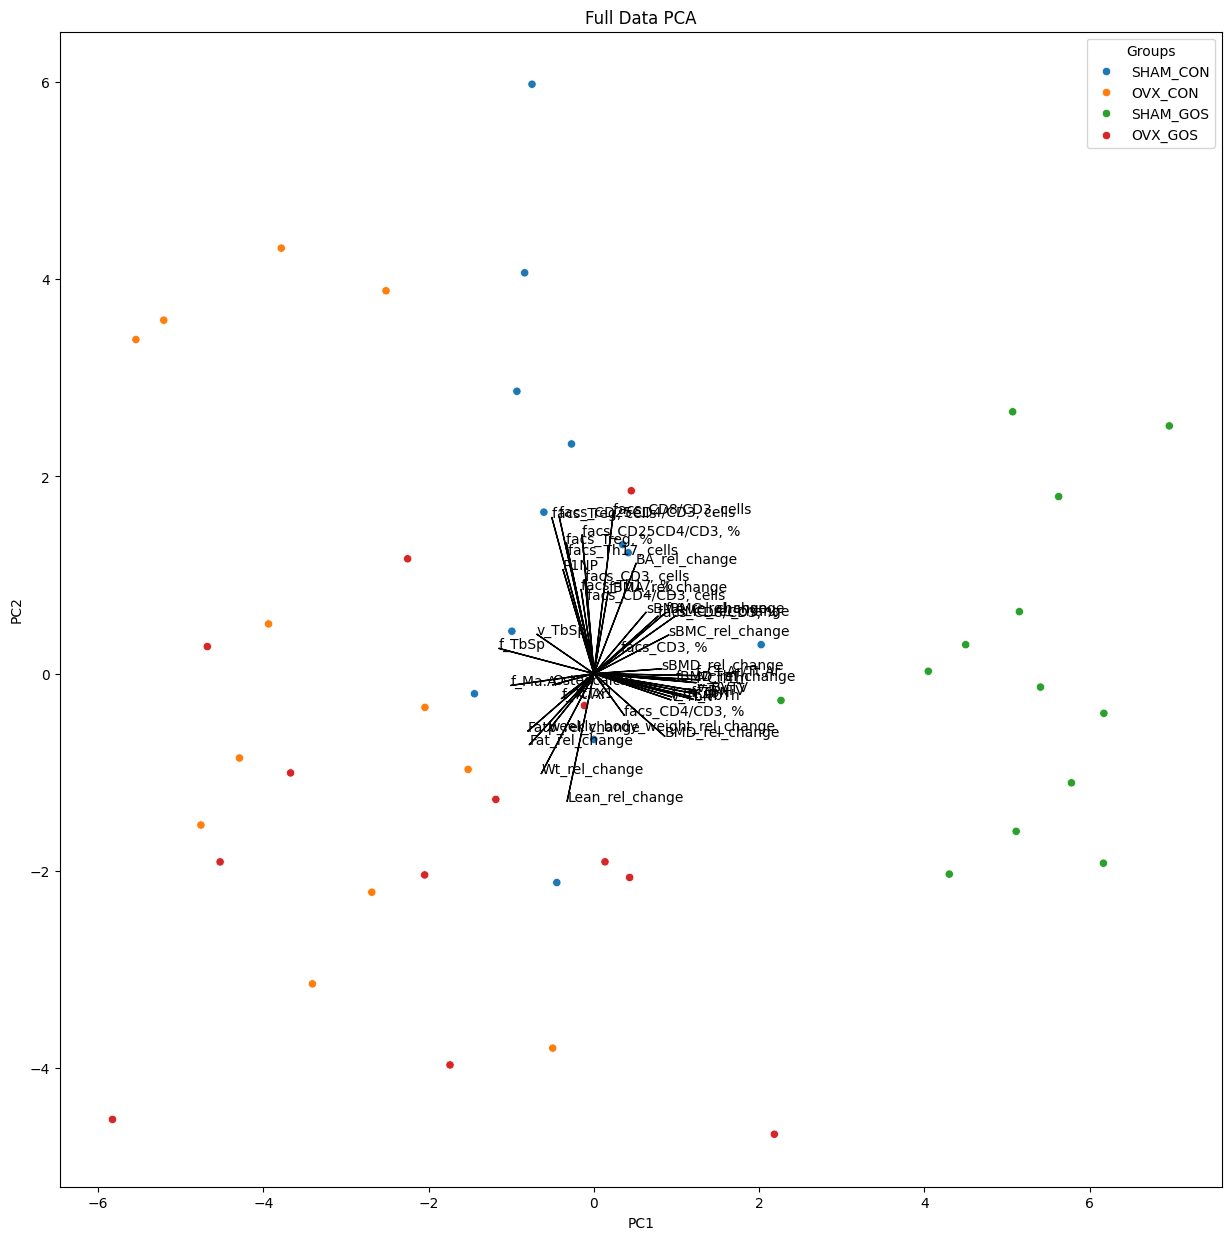

In [88]:
i,j = 0, 1 # which components
fig, ax = plt.subplots(1, 1, figsize=(15, 15))
ax=sns.scatterplot(x=scores[:,0], y=scores[:,1], hue=week8_num['Groups'])
ax.set_xlabel('PC%d' % (i+1))
ax.set_ylabel('PC%d' % (j+1))
ax.set_title('Full Data PCA')

for k in range(pca_allgrps.components_.shape[1]):
    ax.arrow(0, 0, pca_allgrps.components_[i,k]*5, pca_allgrps.components_[j,k]*5, color='k')
    ax.text(pca_allgrps.components_[i,k]*5,
            pca_allgrps.components_[j,k]*5,
            allgrps.columns[k])

In [89]:
pca_allgrps.components_.shape

(3, 42)

Text(0.5, 1.0, 'PC1 vs PC2')

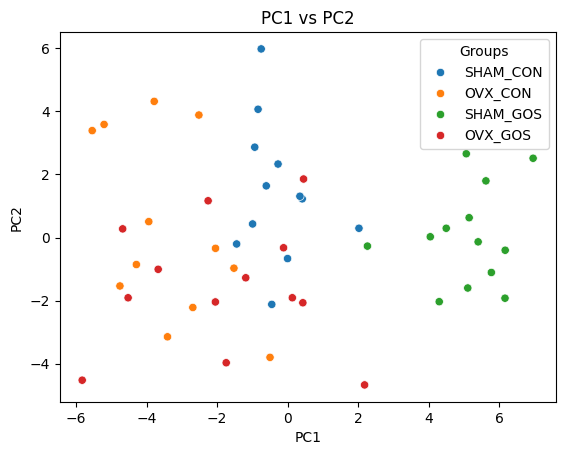

In [90]:
ax=sns.scatterplot(x=scores[:,0], y=scores[:,1], hue=week8_num['Groups'])
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_title('PC1 vs PC2')

/tmp/ipython-input-3127298765.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  c.replace('SHAM_GOS',4,inplace=True)


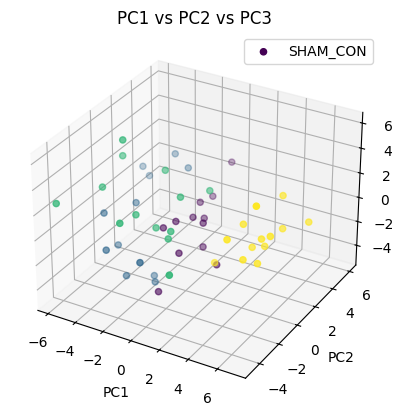

In [91]:
fig=plt.figure()
ax=fig.add_subplot(111, projection='3d')

c=pd.DataFrame(allgrps['Groups'])
c.replace('SHAM_CON',1,inplace=True)
c.replace('OVX_CON',2,inplace=True)
c.replace('OVX_GOS',3,inplace=True)
c.replace('SHAM_GOS',4,inplace=True)
c=c.to_numpy()

ax.scatter(scores[:,0], scores[:,1], scores[:,2],c=c)

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('PC1 vs PC2 vs PC3')

ax.legend(['SHAM_CON','OVX_CON','OVX_GOS','SHAM_GOS'])

In [92]:
loadings = pd.DataFrame(
    pca_allgrps.components_.T,
    columns = ['PC1', 'PC2', 'PC3'])

loadings['Features'] = allgrps.columns[0:42]

a = loadings[['Features', 'PC1', 'PC2', 'PC3']]
a

Features       PC1       PC2       PC3
0                            CTX1 -0.039999 -0.047578 -0.133001
1                            P1NP -0.074898  0.211128 -0.144718
2                     Osteocalcin -0.099837 -0.022778 -0.061151
3                          f_BVTV  0.247738 -0.041530  0.143784
4                          f_TbTh  0.240636 -0.052146  0.137368
5                          f_TbSp -0.229923  0.051223 -0.091707
6                           f_TbN  0.232860 -0.046255  0.141999
7                         f_Tt.Ar -0.078369 -0.050454  0.048059
8                         f_Ct.Ar  0.188016 -0.047174  0.057469
9                         f_Ct.Th  0.247088 -0.018349  0.047399
10                  f_Ct.Ar/Tt.Ar  0.246301 -0.003905  0.017755
11                         f_Ma.A -0.200754 -0.023888  0.014904
12                         v_BVTV  0.248624 -0.035198  0.166953
13                         v_TbTh  0.256259 -0.012723  0.119418
14                         v_TbSp -0.137950  0.079870 -0.145988
15                          v_TbN  0.186039 -0.053132  0.187694
16                    facs_CD3, %  0.064994  0.046280  0.139781
17                facs_CD4/CD3, %  0.073591 -0.084648 -0.218971
18                facs_CD8/CD3, %  0.155230  0.116629 -0.128294
19            facs_CD25CD4/CD3, % -0.028606  0.281305  0.195831
20                   facs_Treg, % -0.066819  0.264774  0.144597
21                   facs_Th17, % -0.031016  0.170611  0.095983
22                facs_CD3, cells -0.021762  0.188909  0.228638
23            facs_CD4/CD3, cells -0.016169  0.150844  0.006909
24            facs_CD8/CD3, cells  0.046907  0.326216  0.071873
25        facs_CD25CD4/CD3, cells -0.084251  0.319013  0.235330
26               facs_Treg, cells -0.101920  0.316747  0.202642
27               facs_Th17, cells -0.061634  0.241384  0.147257
28                sBMD_rel_change  0.164232  0.009791  0.069473
29                sBMC_rel_change  0.180798  0.078334 -0.038098
30                sBMA_rel_change  0.125991  0.124465 -0.169033
31                fBMD_rel_change  0.197441 -0.013402  0.091077
32                fBMC_rel_change  0.174146  0.123983 -0.047070
33                fBMA_rel_change  0.034524  0.166960 -0.156777
34                 BMD_rel_change  0.171254 -0.126920 -0.032700
35                 BMC_rel_change  0.198164  0.117593 -0.015443
36                  BA_rel_change  0.102094  0.223809  0.001003
37                Lean_rel_change -0.064809 -0.258516  0.221240
38                 Fat_rel_change -0.156098 -0.143972  0.302617
39                Fatp_rel_change -0.159730 -0.116444  0.286861
40                  Wt_rel_change -0.127310 -0.202599  0.300174
41  weekly_body_weight_rel_change -0.110791 -0.115410  0.265024

In [93]:
a_sorted=a.sort_values(by=['PC1'],key=abs,ascending=False)
a_sorted

Features       PC1       PC2       PC3
13                         v_TbTh  0.256259 -0.012723  0.119418
12                         v_BVTV  0.248624 -0.035198  0.166953
3                          f_BVTV  0.247738 -0.041530  0.143784
9                         f_Ct.Th  0.247088 -0.018349  0.047399
10                  f_Ct.Ar/Tt.Ar  0.246301 -0.003905  0.017755
4                          f_TbTh  0.240636 -0.052146  0.137368
6                           f_TbN  0.232860 -0.046255  0.141999
5                          f_TbSp -0.229923  0.051223 -0.091707
11                         f_Ma.A -0.200754 -0.023888  0.014904
35                 BMC_rel_change  0.198164  0.117593 -0.015443
31                fBMD_rel_change  0.197441 -0.013402  0.091077
8                         f_Ct.Ar  0.188016 -0.047174  0.057469
15                          v_TbN  0.186039 -0.053132  0.187694
29                sBMC_rel_change  0.180798  0.078334 -0.038098
32                fBMC_rel_change  0.174146  0.123983 -0.047070
34                 BMD_rel_change  0.171254 -0.126920 -0.032700
28                sBMD_rel_change  0.164232  0.009791  0.069473
39                Fatp_rel_change -0.159730 -0.116444  0.286861
38                 Fat_rel_change -0.156098 -0.143972  0.302617
18                facs_CD8/CD3, %  0.155230  0.116629 -0.128294
14                         v_TbSp -0.137950  0.079870 -0.145988
40                  Wt_rel_change -0.127310 -0.202599  0.300174
30                sBMA_rel_change  0.125991  0.124465 -0.169033
41  weekly_body_weight_rel_change -0.110791 -0.115410  0.265024
36                  BA_rel_change  0.102094  0.223809  0.001003
26               facs_Treg, cells -0.101920  0.316747  0.202642
2                     Osteocalcin -0.099837 -0.022778 -0.061151
25        facs_CD25CD4/CD3, cells -0.084251  0.319013  0.235330
7                         f_Tt.Ar -0.078369 -0.050454  0.048059
1                            P1NP -0.074898  0.211128 -0.144718
17                facs_CD4/CD3, %  0.073591 -0.084648 -0.218971
20                   facs_Treg, % -0.066819  0.264774  0.144597
16                    facs_CD3, %  0.064994  0.046280  0.139781
37                Lean_rel_change -0.064809 -0.258516  0.221240
27               facs_Th17, cells -0.061634  0.241384  0.147257
24            facs_CD8/CD3, cells  0.046907  0.326216  0.071873
0                            CTX1 -0.039999 -0.047578 -0.133001
33                fBMA_rel_change  0.034524  0.166960 -0.156777
21                   facs_Th17, % -0.031016  0.170611  0.095983
19            facs_CD25CD4/CD3, % -0.028606  0.281305  0.195831
22                facs_CD3, cells -0.021762  0.188909  0.228638
23            facs_CD4/CD3, cells -0.016169  0.150844  0.006909

In [94]:
arrow_vals1=np.array(a_sorted)
arrow_vals1

array([['v_TbTh', 0.2562591065674166, -0.012723268376306059,
        0.11941778742883209],
       ['v_BVTV', 0.24862426303371565, -0.03519844595175685,
        0.1669530587648028],
       ['f_BVTV', 0.24773821357232345, -0.04153038457737984,
        0.1437838203604479],
       ['f_Ct.Th', 0.24708849452854403, -0.018349483657847502,
        0.047398831742320305],
       ['f_Ct.Ar/Tt.Ar', 0.2463014441492404, -0.003905402679802765,
        0.01775498136585232],
       ['f_TbTh', 0.24063573613946168, -0.052146104514878444,
        0.13736789201181476],
       ['f_TbN', 0.23285981647075302, -0.04625519504361497,
        0.1419987367528216],
       ['f_TbSp', -0.22992300781700223, 0.05122275966914447,
        -0.0917074873619051],
       ['f_Ma.A', -0.20075389840738622, -0.023888017814241824,
        0.014903794153352887],
       ['BMC_rel_change', 0.19816408260970925, 0.11759264369538207,
        -0.015443067628981509],
       ['fBMD_rel_change', 0.19744135996248924, -0.013401678743390256,


In [95]:
arrow_vals1[0,1]

0.2562591065674166

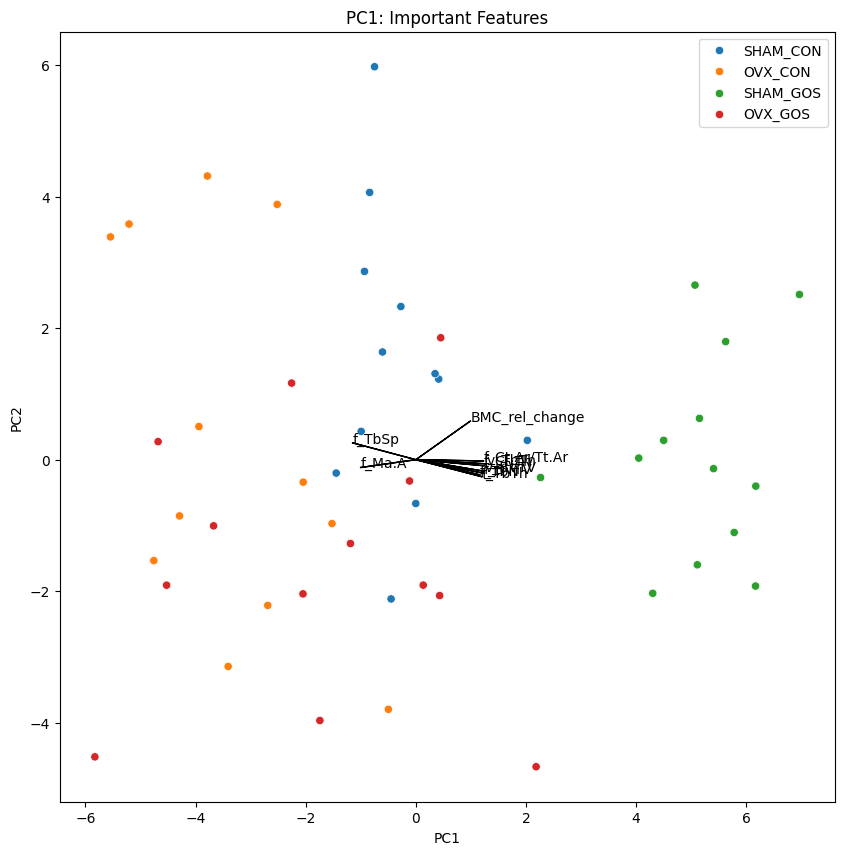

In [96]:
fig, ax = plt.subplots(figsize=(10, 10))
ax=sns.scatterplot(x=scores[:,0], y=scores[:,1], hue=week8_num['Groups'])
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_title('PC1: Important Features')
ax.legend(loc='upper right')

#top 10 features related to PC1
for i in range(10):
  ax.arrow(0,0,arrow_vals1[i,1]*5,arrow_vals1[i,2]*5,color='k')
  ax.text(arrow_vals1[i,1]*5,arrow_vals1[i,2]*5,arrow_vals1[i,0])

#bottom 5 features
#for i in range(37,42):
 # ax.arrow(0,0,arrow_vals[i,1],arrow_vals[i,2],color='m')
  #ax.text(arrow_vals[i,1],arrow_vals[i,2],arrow_vals[i,0])

In [97]:
a2_sorted=a.sort_values(by=['PC2'],key=abs,ascending=False)
a2_sorted

Features       PC1       PC2       PC3
24            facs_CD8/CD3, cells  0.046907  0.326216  0.071873
25        facs_CD25CD4/CD3, cells -0.084251  0.319013  0.235330
26               facs_Treg, cells -0.101920  0.316747  0.202642
19            facs_CD25CD4/CD3, % -0.028606  0.281305  0.195831
20                   facs_Treg, % -0.066819  0.264774  0.144597
37                Lean_rel_change -0.064809 -0.258516  0.221240
27               facs_Th17, cells -0.061634  0.241384  0.147257
36                  BA_rel_change  0.102094  0.223809  0.001003
1                            P1NP -0.074898  0.211128 -0.144718
40                  Wt_rel_change -0.127310 -0.202599  0.300174
22                facs_CD3, cells -0.021762  0.188909  0.228638
21                   facs_Th17, % -0.031016  0.170611  0.095983
33                fBMA_rel_change  0.034524  0.166960 -0.156777
23            facs_CD4/CD3, cells -0.016169  0.150844  0.006909
38                 Fat_rel_change -0.156098 -0.143972  0.302617
34                 BMD_rel_change  0.171254 -0.126920 -0.032700
30                sBMA_rel_change  0.125991  0.124465 -0.169033
32                fBMC_rel_change  0.174146  0.123983 -0.047070
35                 BMC_rel_change  0.198164  0.117593 -0.015443
18                facs_CD8/CD3, %  0.155230  0.116629 -0.128294
39                Fatp_rel_change -0.159730 -0.116444  0.286861
41  weekly_body_weight_rel_change -0.110791 -0.115410  0.265024
17                facs_CD4/CD3, %  0.073591 -0.084648 -0.218971
14                         v_TbSp -0.137950  0.079870 -0.145988
29                sBMC_rel_change  0.180798  0.078334 -0.038098
15                          v_TbN  0.186039 -0.053132  0.187694
4                          f_TbTh  0.240636 -0.052146  0.137368
5                          f_TbSp -0.229923  0.051223 -0.091707
7                         f_Tt.Ar -0.078369 -0.050454  0.048059
0                            CTX1 -0.039999 -0.047578 -0.133001
8                         f_Ct.Ar  0.188016 -0.047174  0.057469
16                    facs_CD3, %  0.064994  0.046280  0.139781
6                           f_TbN  0.232860 -0.046255  0.141999
3                          f_BVTV  0.247738 -0.041530  0.143784
12                         v_BVTV  0.248624 -0.035198  0.166953
11                         f_Ma.A -0.200754 -0.023888  0.014904
2                     Osteocalcin -0.099837 -0.022778 -0.061151
9                         f_Ct.Th  0.247088 -0.018349  0.047399
31                fBMD_rel_change  0.197441 -0.013402  0.091077
13                         v_TbTh  0.256259 -0.012723  0.119418
28                sBMD_rel_change  0.164232  0.009791  0.069473
10                  f_Ct.Ar/Tt.Ar  0.246301 -0.003905  0.017755

In [98]:
arrow_vals2=np.array(a2_sorted)
arrow_vals2

array([['facs_CD8/CD3, cells', 0.04690694132268374, 0.32621566305508864,
        0.0718729669494024],
       ['facs_CD25CD4/CD3, cells', -0.08425148714634194,
        0.319013296685531, 0.23532951184390974],
       ['facs_Treg, cells', -0.10192016363950952, 0.3167473592070511,
        0.20264184213623704],
       ['facs_CD25CD4/CD3, %', -0.02860600879232359, 0.2813049409850728,
        0.19583107999768098],
       ['facs_Treg, %', -0.06681947978290549, 0.26477422658183963,
        0.1445966922065017],
       ['Lean_rel_change', -0.0648087750500545, -0.25851558537036107,
        0.22124026990034934],
       ['facs_Th17, cells', -0.06163441880596065, 0.24138367366255412,
        0.1472569682981079],
       ['BA_rel_change', 0.10209429282604182, 0.2238093269276534,
        0.0010030611257095623],
       ['P1NP', -0.07489779861483359, 0.211127758239825,
        -0.14471814940194067],
       ['Wt_rel_change', -0.12731012040201958, -0.2025985214711941,
        0.30017363447524303],
       ['

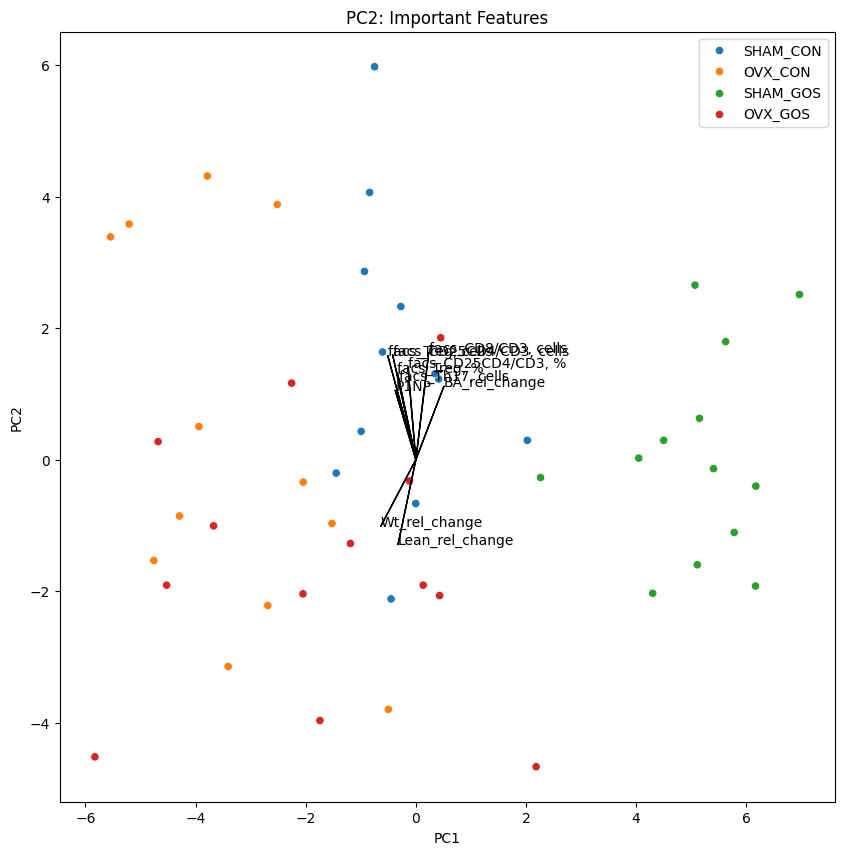

In [99]:
fig, ax = plt.subplots(figsize=(10, 10))
ax=sns.scatterplot(x=scores[:,0], y=scores[:,1], hue=week8_num['Groups'])
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_title('PC2: Important Features')
ax.legend(loc='upper right')

#top 10 features related to PC2
for i in range(10):
  ax.arrow(0,0,arrow_vals2[i,1]*5,arrow_vals2[i,2]*5,color='k')
  ax.text(arrow_vals2[i,1]*5,arrow_vals2[i,2]*5,arrow_vals2[i,0])